# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [13]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#separating byte files and asm files 

source = 'asmFiles'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            shutil.move(source+'/'+file,destination)

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


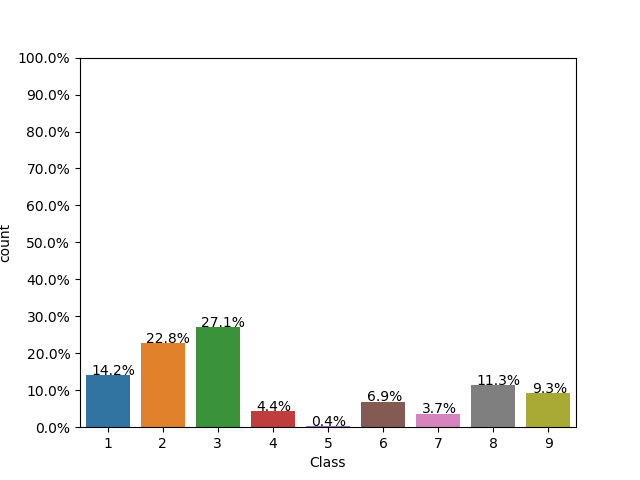

In [2]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [73]:
#file sizes of byte files

files=os.listdir('E:\\naveen\\byteFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('E:\\naveen\\byteFiles\\'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
data_size_byte['ID']=data_size_byte['ID']
print (data_size_byte.head())
data_size_byte.to_csv('E:\\Naveen\\data_size_byte.csv')
#data_size_byte=pd.read_csv('data_size_byte.csv')


                     ID      size  Class
0  01azqd4InC7m9JpocGv5  4.234863      9
1  01IsoiSMh5gxyDYTl4CB  5.538818      2
2  01jsnpXSAlgw6aPeDxrU  3.887939      9
3  01kcPWA9K2BOxQeS5Rju  0.574219      1
4  01SuzwMJEIXsK7A8dQbl  0.370850      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


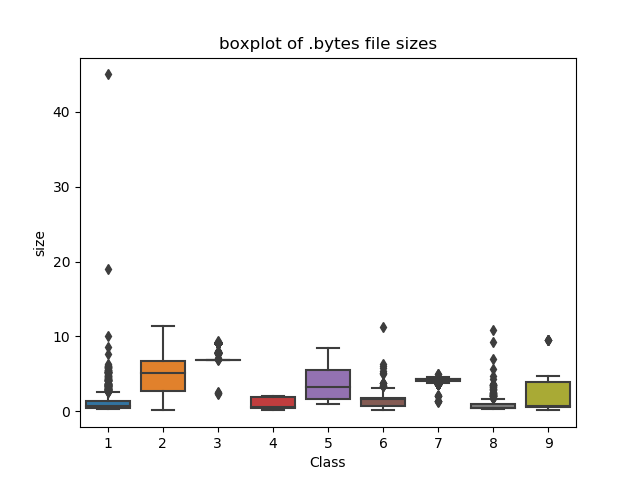

In [74]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [ ]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+'.bytes',"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+'.bytes')
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i)+",")
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [75]:
byte_features=pd.read_csv("E:\\Naveen\\result.csv")
byte_features.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff     ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753   1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902   8588  
2  9107  ...  2325  2358  2242  2885  2863  2471  2786   2680  49144    468  
3  1078  ...   478   873   485   462   516  1133   471    761   7998  13940  
4   422  ...   847   947   350   209   239   653   221    242   2199   9008  

[5 rows x 258 columns]

In [76]:
result = pd.merge(byte_features, data_size_byte[['ID','size','Class']],on='ID', how='left')
result.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753   1824  4.234863   
1  9291  ...   439   281   302  7639   518  17001  54902   8588  5.538818   
2  9107  ...  2242  2885  2863  2471  2786   2680  49144    468  3.887939   
3  1078  ...   485   462   516  1133   471    761   7998  13940  0.574219   
4   422  ...   350   209   239   653   221    242   2199   9008  0.370850   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

In [14]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


In [78]:
result = normalize(result)
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


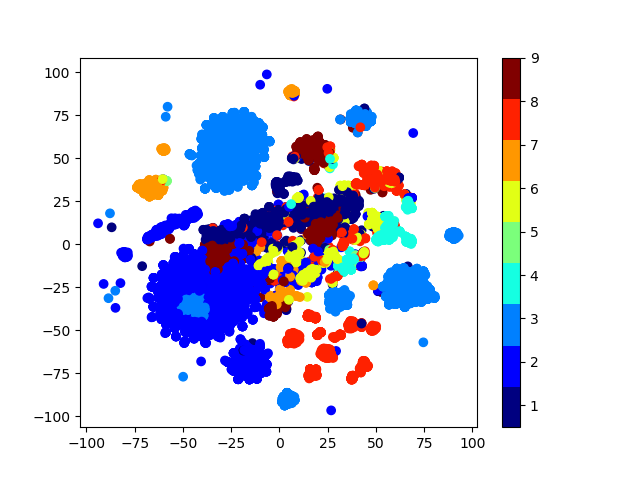

In [115]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


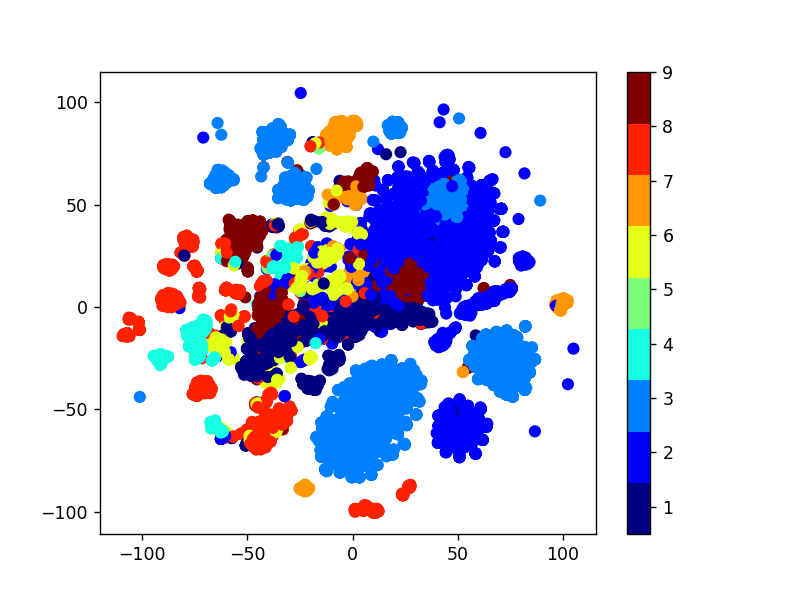

In [0]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [79]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [142]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


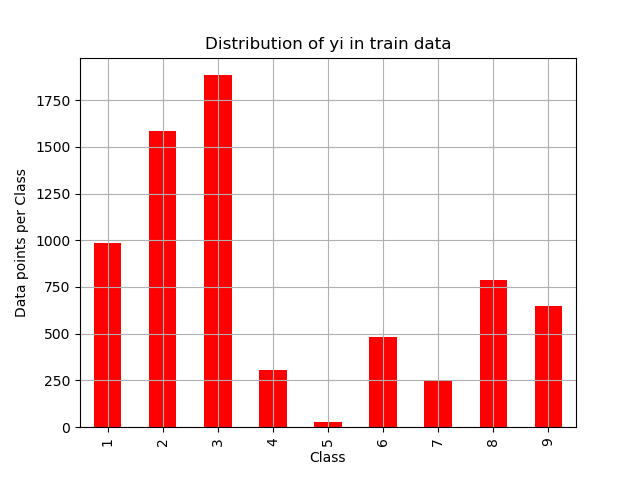

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


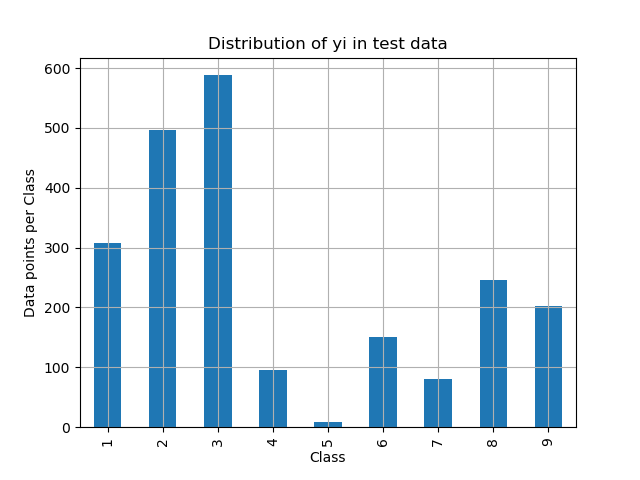

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


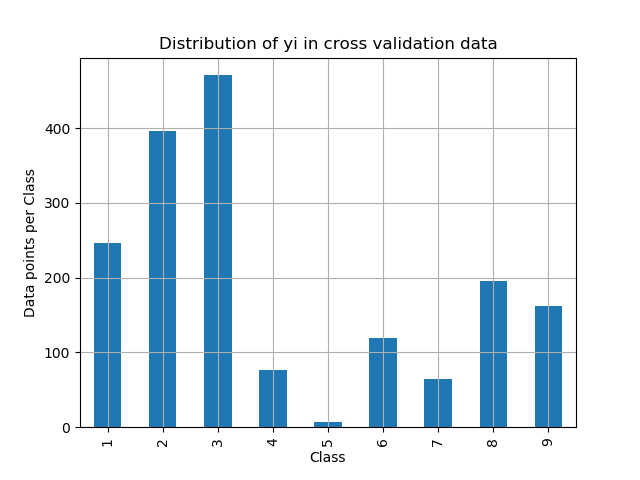

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [76]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = 'rgb'
train_class_distribution.plot(kind='bar',color='r')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
#my_colors = 'rgbmckyw'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbmckyw'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [5]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.4982103263958098
Log loss on Test Data using Random Model 2.499318458606721
Number of misclassified points  89.28242870285189
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


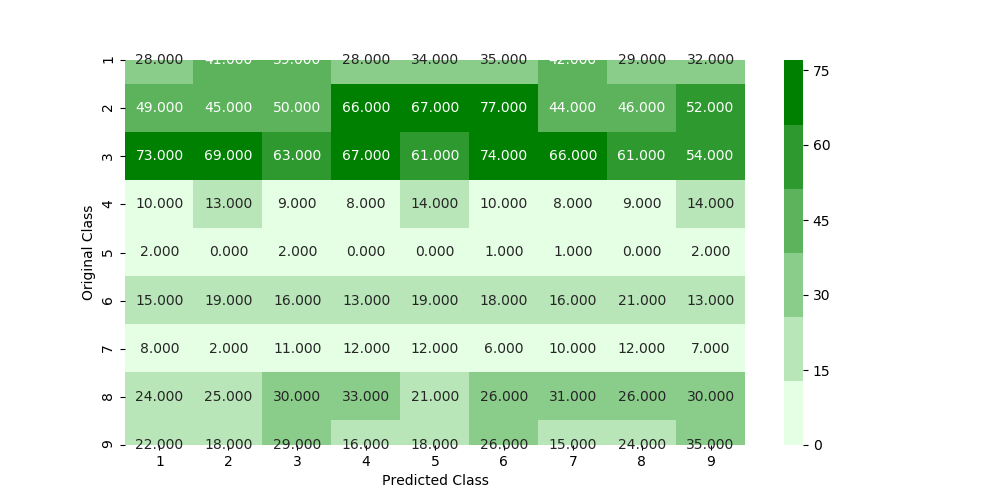

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


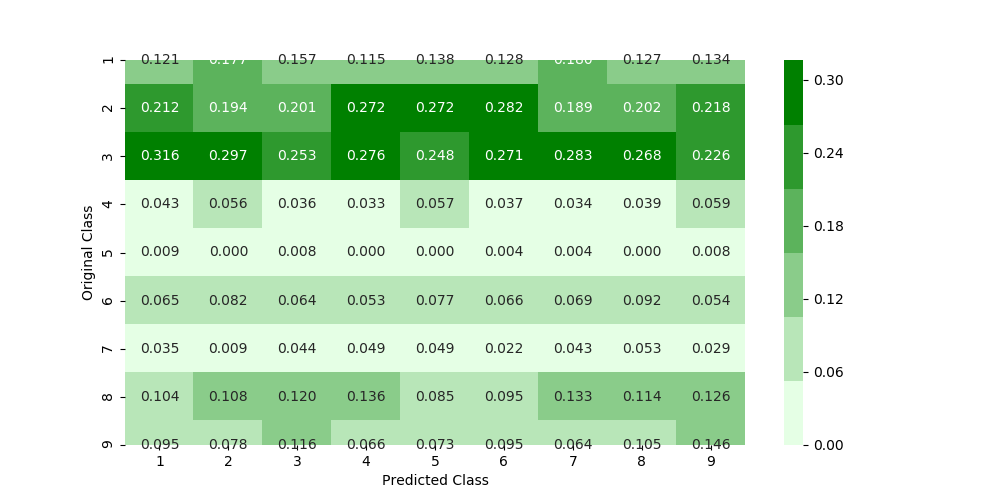

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


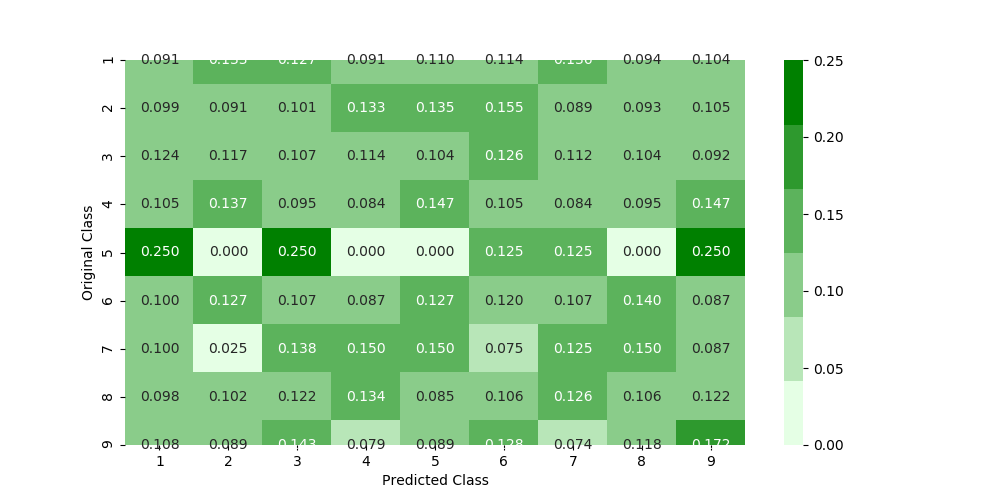

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [59]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.20832691328142
log_loss for k =  3 is 0.210135409958513
log_loss for k =  5 is 0.23361217062151965
log_loss for k =  7 is 0.2576445688925703
log_loss for k =  9 is 0.2758721309755745
log_loss for k =  11 is 0.29188573065095197
log_loss for k =  13 is 0.30400885102847813


<IPython.core.display.Javascript object>


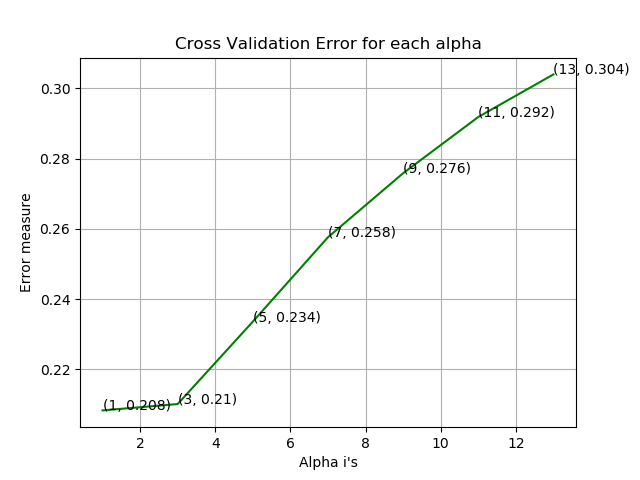

For values of best alpha =  1 The train log loss is: 0.07981830201606137
For values of best alpha =  1 The cross validation log loss is: 0.20832691328142
For values of best alpha =  1 The test log loss is: 0.23020699784316667
Number of misclassified points  4.875804967801288
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


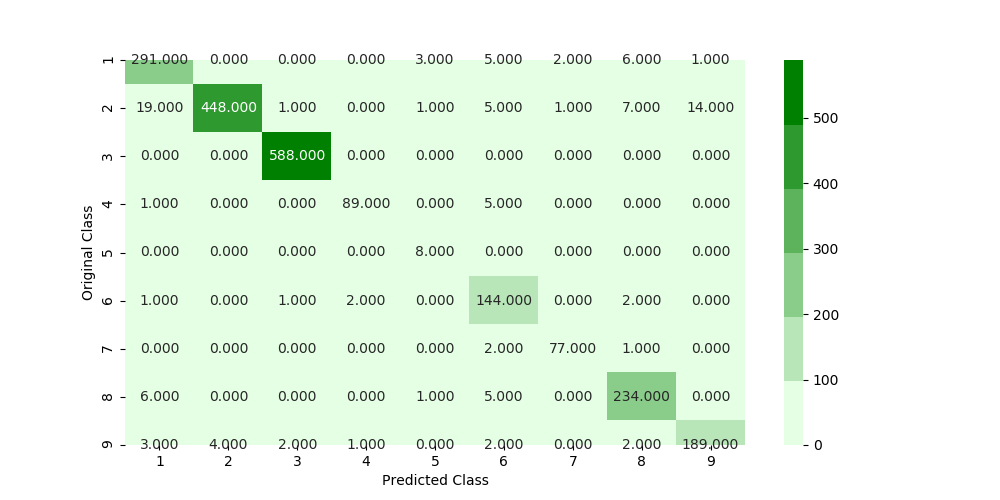

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


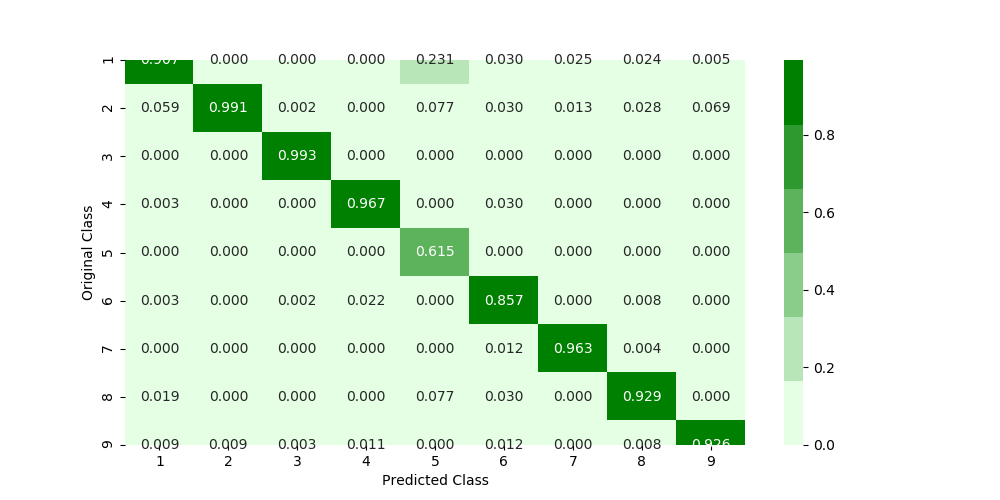

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


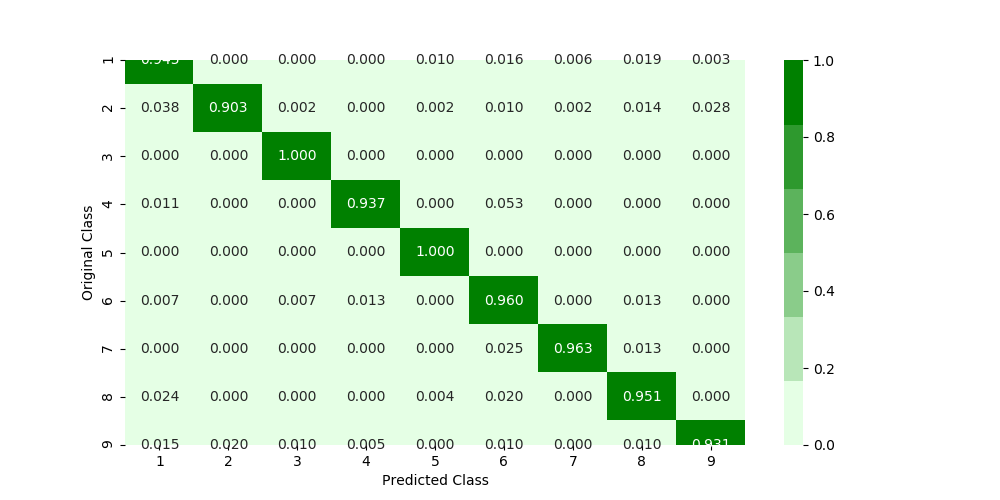

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [77]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.5815010845911814
log_loss for c =  0.0001 is 1.5855774986068114
log_loss for c =  0.001 is 1.5343415868784653
log_loss for c =  0.01 is 1.0558854674799227
log_loss for c =  0.1 is 0.9172669997082592
log_loss for c =  1 is 0.7581265640634496
log_loss for c =  10 is 0.603953892425764
log_loss for c =  100 is 0.5507166864150201
log_loss for c =  1000 is 0.6570193138286186


<IPython.core.display.Javascript object>


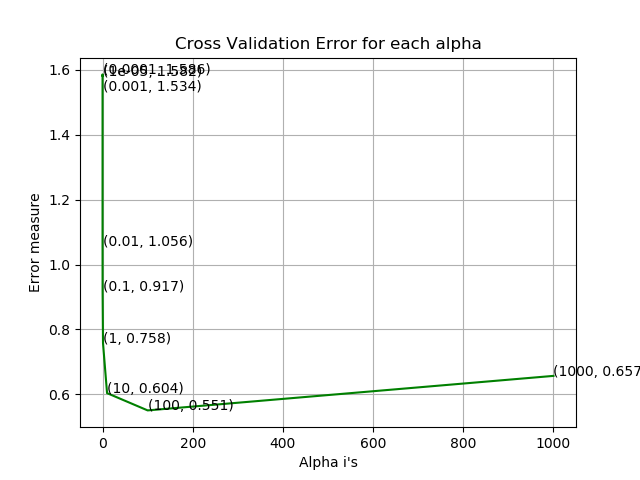

log loss for train data 0.49642728184153995
log loss for cv data 0.5507166864150201
log loss for test data 0.544012754056229
Number of misclassified points  11.86752529898804
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


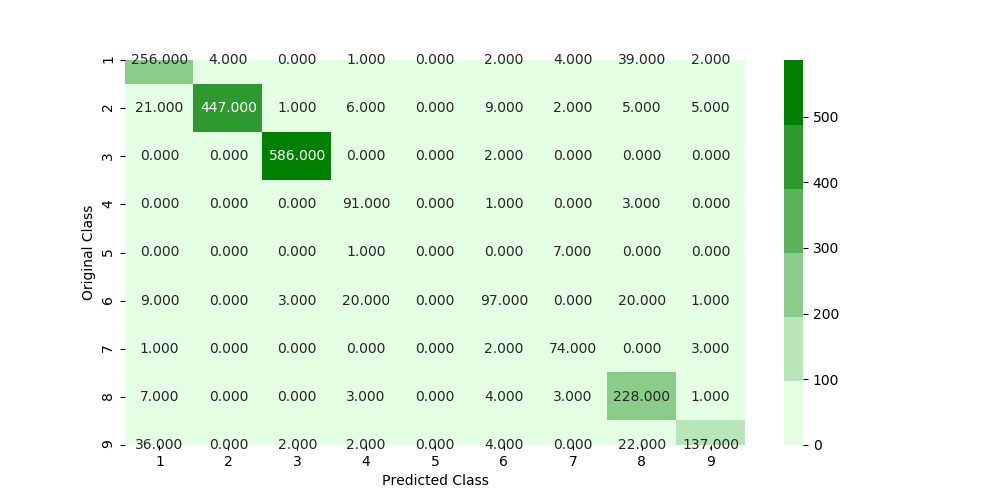

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


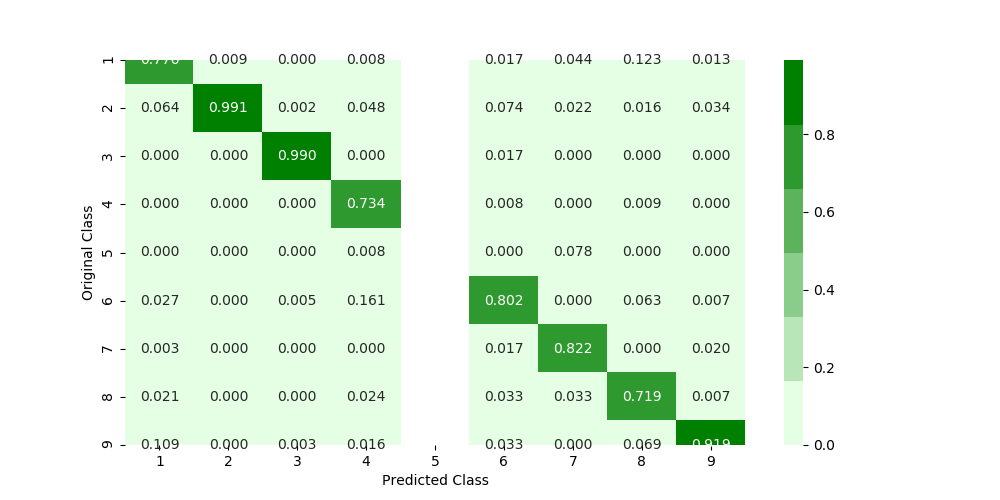

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


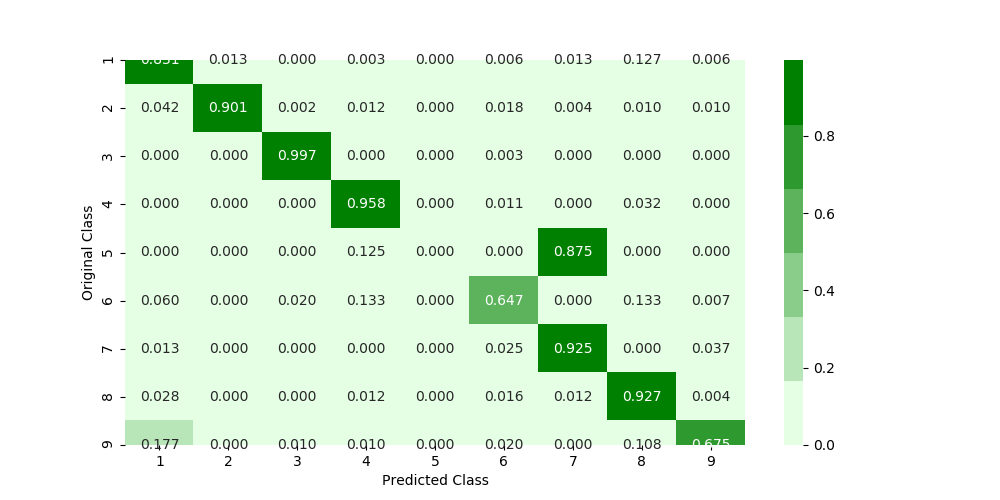

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [78]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.08364698166016325
log_loss for c =  50 is 0.0724374468617527
log_loss for c =  100 is 0.06908847106526789
log_loss for c =  500 is 0.06771758030183453
log_loss for c =  1000 is 0.0677879390652242
log_loss for c =  2000 is 0.0675506120435385
log_loss for c =  3000 is 0.06743202418947608


<IPython.core.display.Javascript object>

For values of best alpha =  3000 The train log loss is: 0.028060931823915822
For values of best alpha =  3000 The cross validation log loss is: 0.06743202418947608
For values of best alpha =  3000 The test log loss is: 0.0717042808984688
Number of misclassified points  1.6559337626494939
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


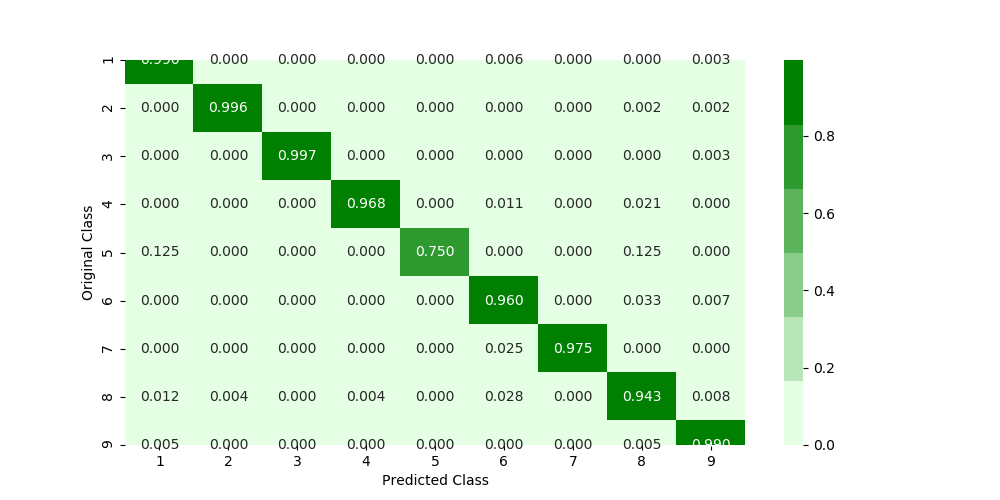

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

log_loss for c =  10 is 0.19266236211479928
log_loss for c =  50 is 0.10546866292909672
log_loss for c =  100 is 0.06980048514911401
log_loss for c =  500 is 0.054242923261040396
log_loss for c =  1000 is 0.05341144710803517
log_loss for c =  2000 is 0.053600648213516504


<IPython.core.display.Javascript object>


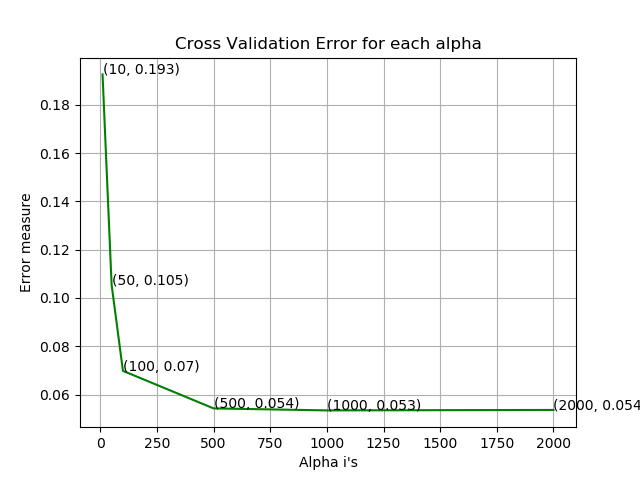

For values of best alpha =  1000 The train log loss is: 0.02488547672504574
For values of best alpha =  1000 The cross validation log loss is: 0.05341144710803517
For values of best alpha =  1000 The test log loss is: 0.07373690685889675
Number of misclassified points  1.517939282428703
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


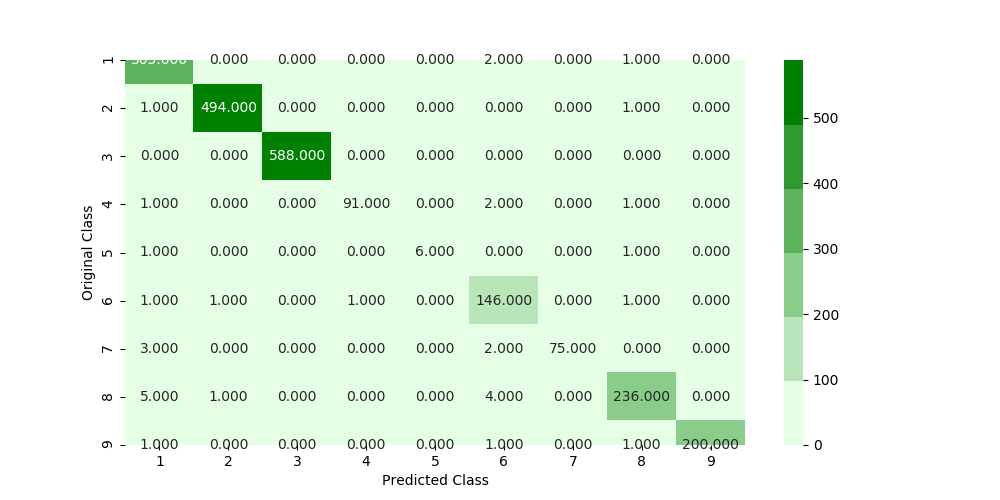

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


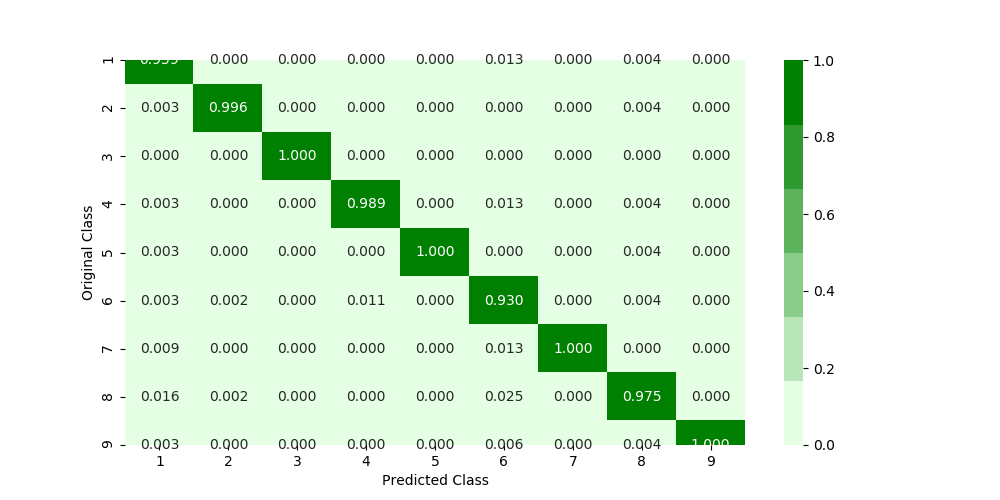

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


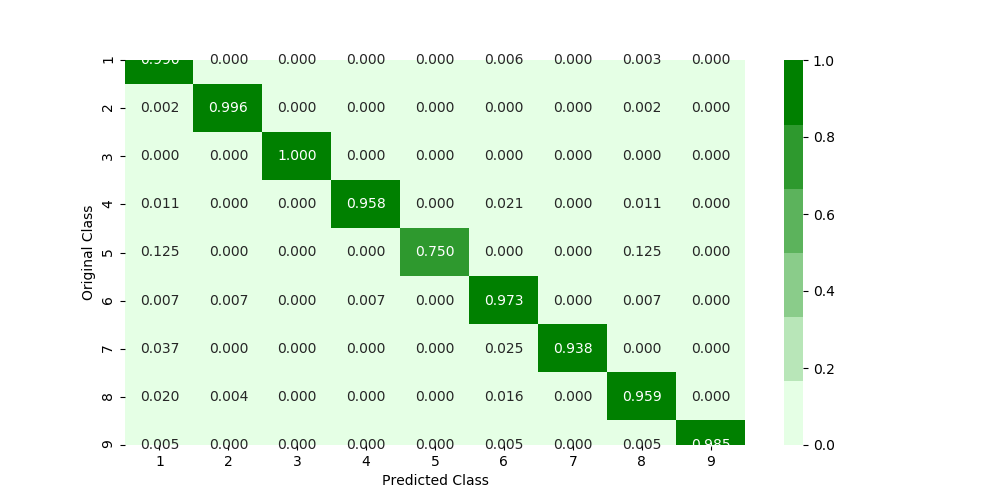

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [81]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 52.7min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 67.5min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 70.6min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [82]:
print (random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.3}


In [83]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.024155333375850876
cv loss 0.07294762607611831
test loss 0.07311263760858945


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [0]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [126]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        print(f2)
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [81]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("E:\\Naveen\\asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [82]:
#file sizes of byte files

files=os.listdir('E:\\Naveen\\asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('E:\\Naveen\\asmFiles\\'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


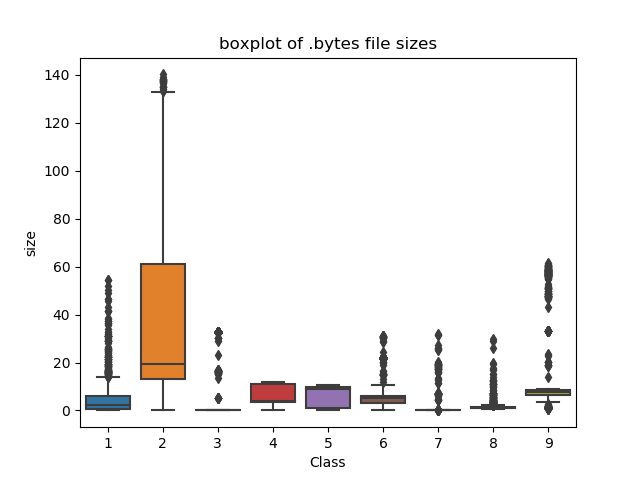

In [83]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [84]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [85]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


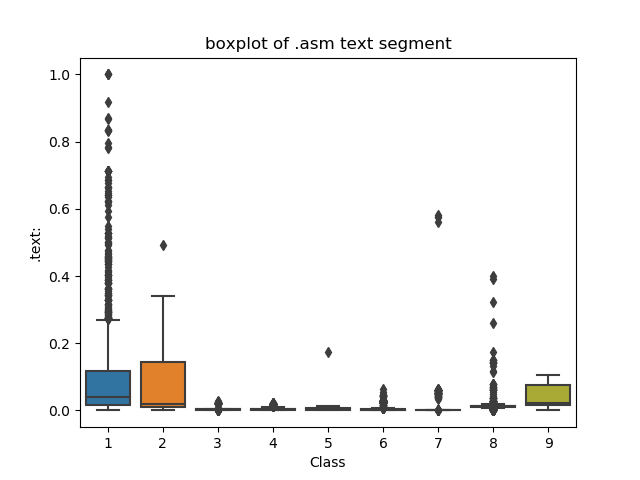

In [149]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


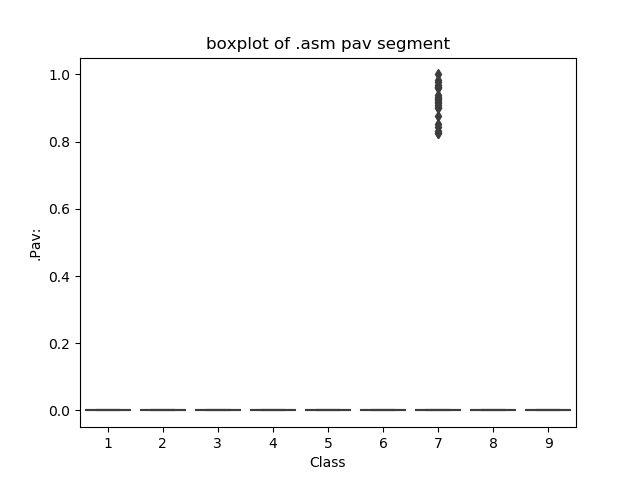

In [91]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


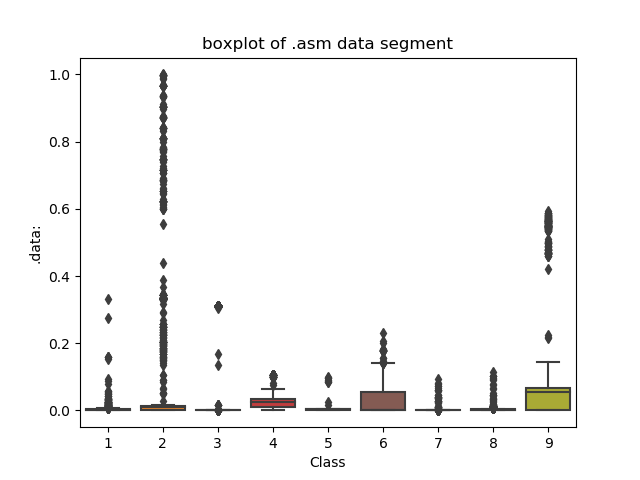

In [92]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


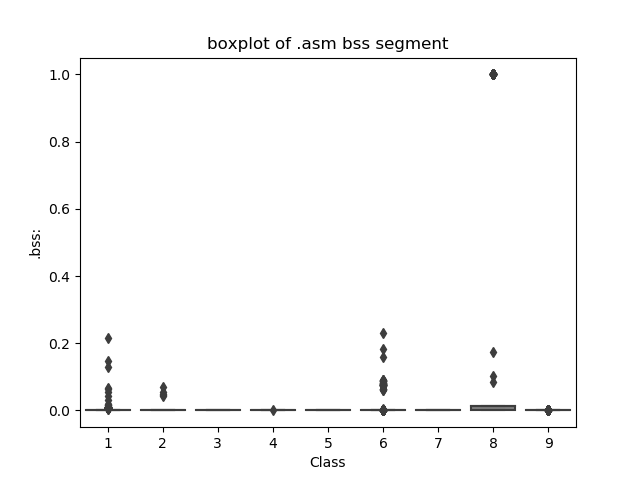

In [93]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


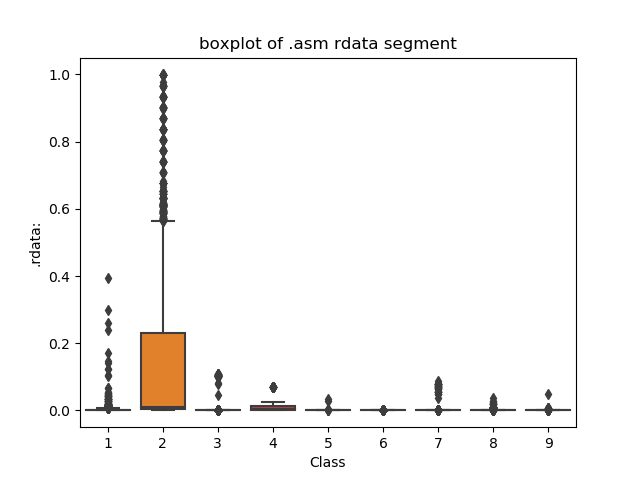

In [94]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


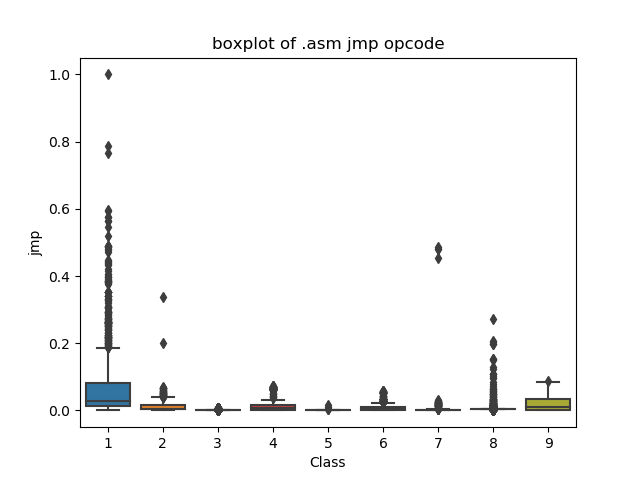

In [95]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


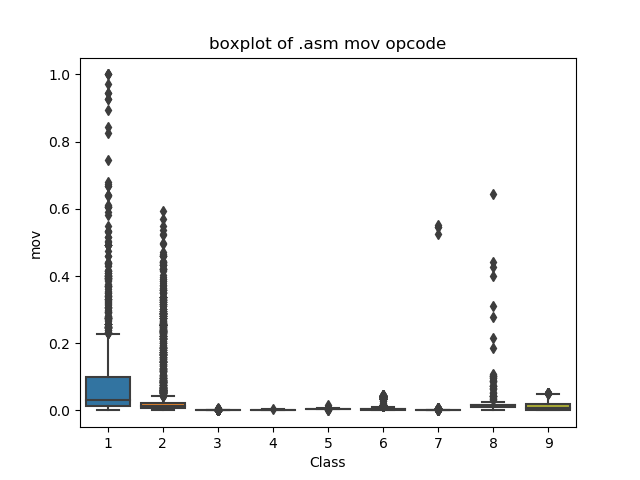

In [96]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


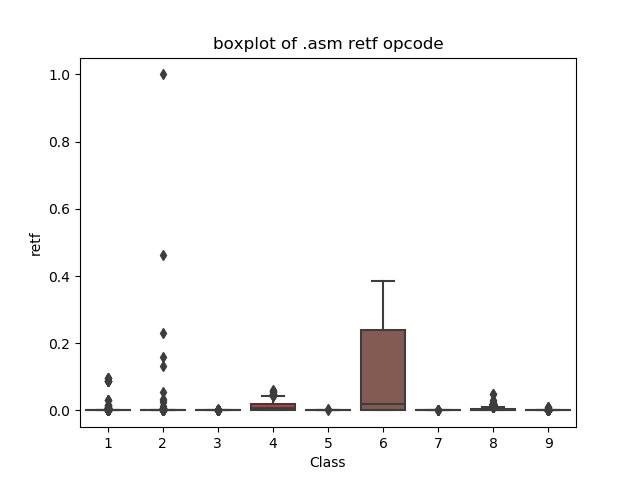

In [97]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


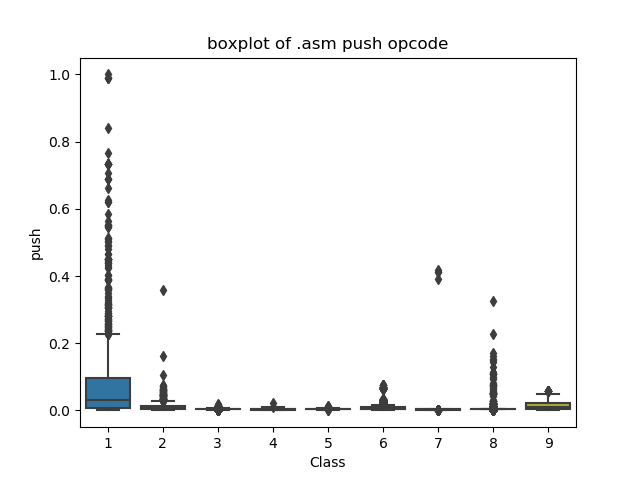

In [98]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


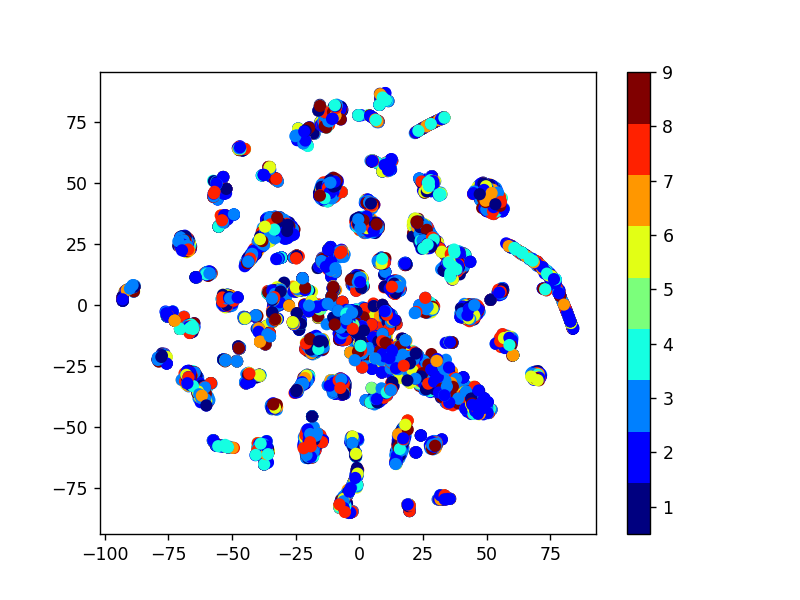

In [0]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


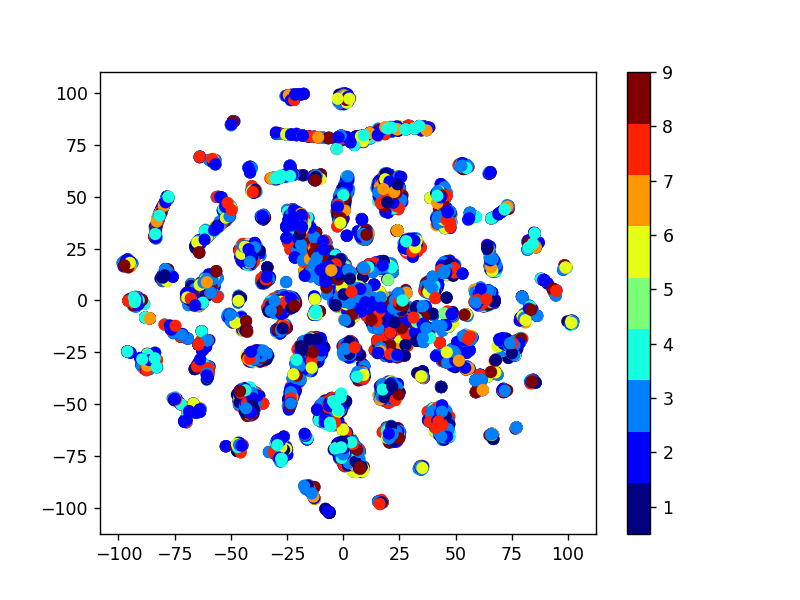

In [0]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [86]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [87]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [118]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.10545966390682174
log_loss for k =  3 is 0.09216413304155417
log_loss for k =  5 is 0.10380107263592035
log_loss for k =  7 is 0.11552974955367946
log_loss for k =  9 is 0.12565154918574997
log_loss for k =  11 is 0.13540422190575707
log_loss for k =  13 is 0.14526348586706073
log_loss for k =  15 is 0.1526529371645707
log_loss for k =  17 is 0.1609273795343236
log_loss for k =  19 is 0.16978686481374128


<IPython.core.display.Javascript object>


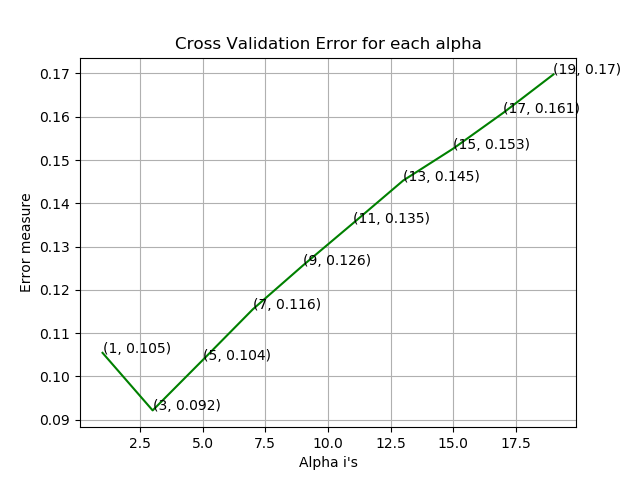

log loss for train data 0.04607981966192876
log loss for cv data 0.09216413304155417
log loss for test data 0.09211300400705665
Number of misclassified points  1.9779208831646733
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


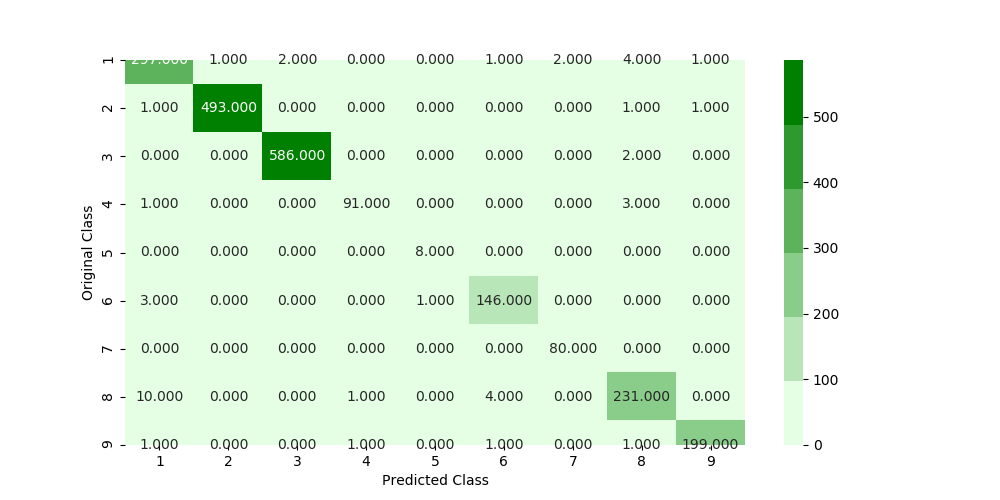

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


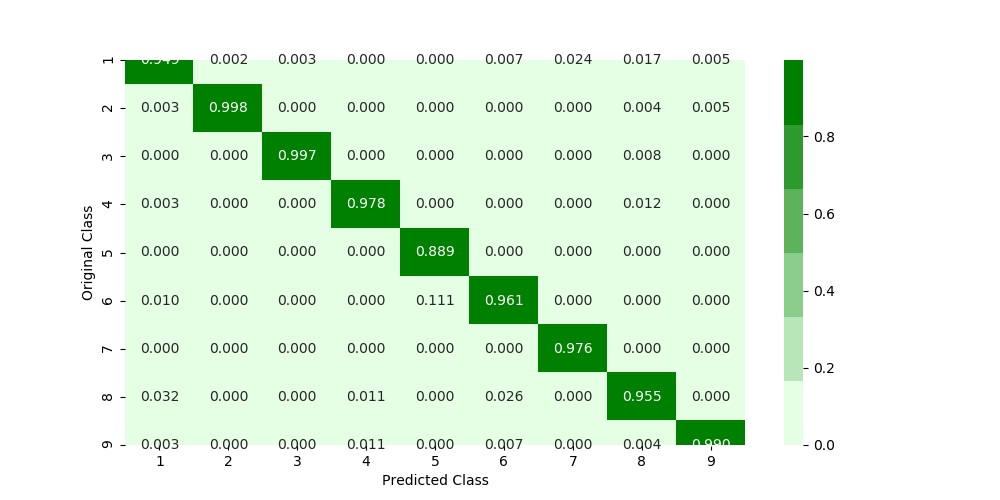

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


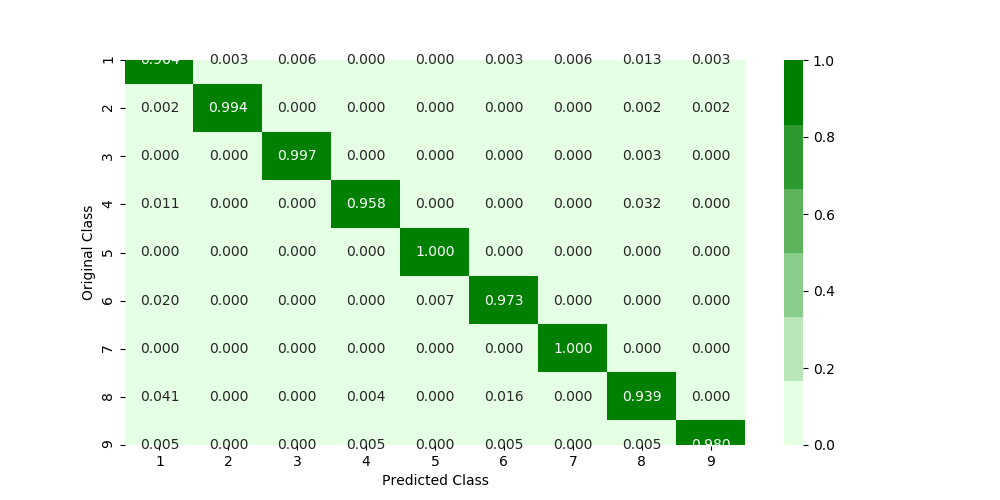

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [133]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.600162448147854
log_loss for c =  0.0001 is 1.5552195916542073
log_loss for c =  0.001 is 1.3010411669397073
log_loss for c =  0.01 is 1.328280986428425
log_loss for c =  0.1 is 1.1603915429970977
log_loss for c =  1 is 0.7689962041761265
log_loss for c =  10 is 0.5294001449591084
log_loss for c =  100 is 0.4045669816930071
log_loss for c =  1000 is 0.32472168991641276


<IPython.core.display.Javascript object>


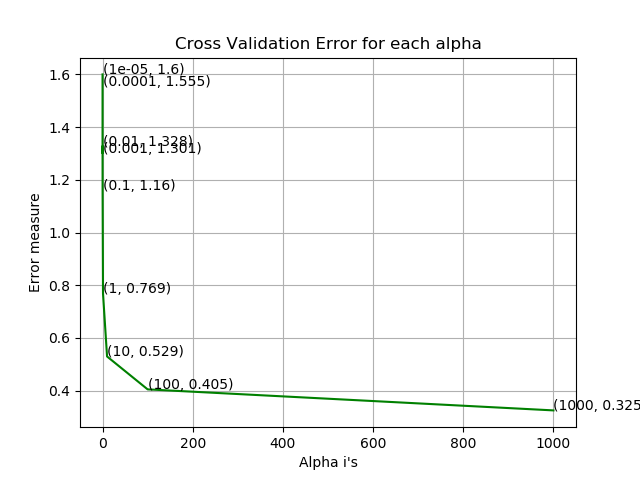

log loss for train data 0.29538095540626114
log loss for cv data 0.32472168991641276
log loss for test data 0.3525359559739646
Number of misclassified points  6.39374425022999
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


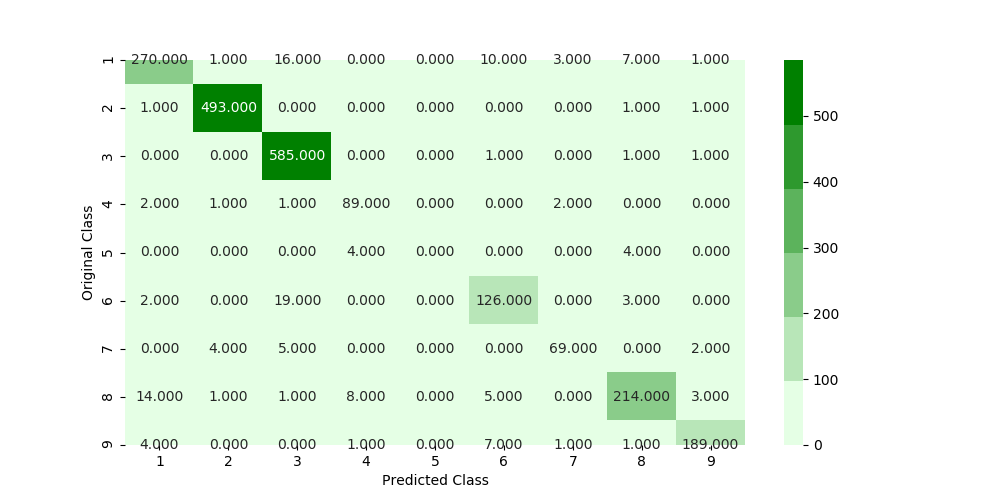

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


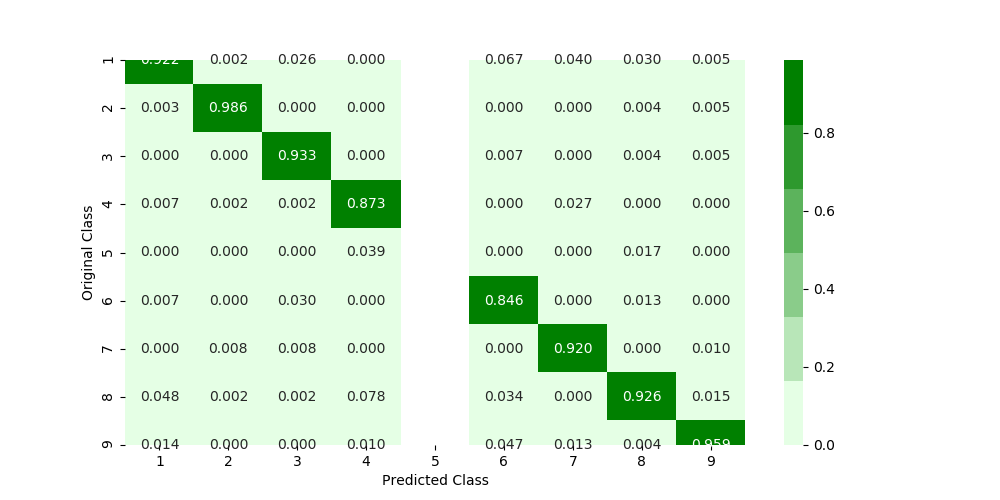

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


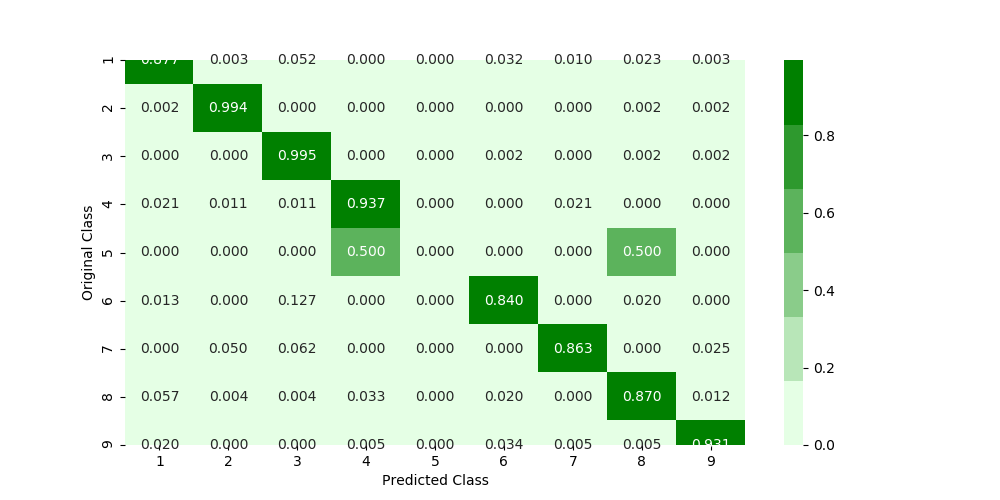

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [134]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.045453832504129356
log_loss for c =  50 is 0.0409739702041707
log_loss for c =  100 is 0.03981706242219565
log_loss for c =  500 is 0.04011372496011318
log_loss for c =  1000 is 0.0401822229429437
log_loss for c =  2000 is 0.03996521322548275
log_loss for c =  3000 is 0.03994637013737835


<IPython.core.display.Javascript object>


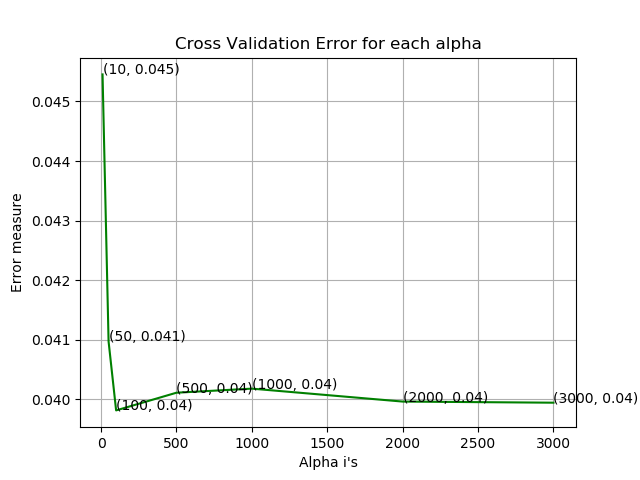

log loss for train data 0.011567583010183662
log loss for cv data 0.03981706242219565
log loss for test data 0.040079954877854665
Number of misclassified points  0.7359705611775529
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


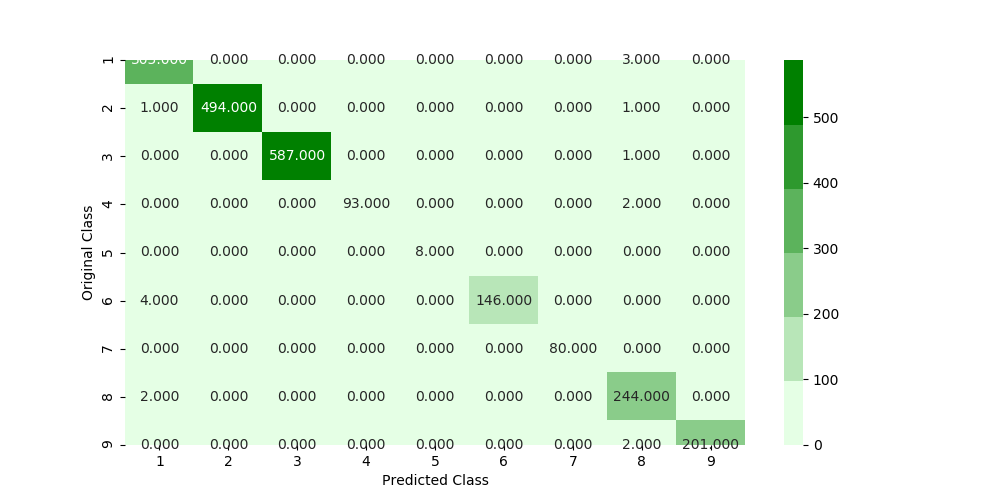

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


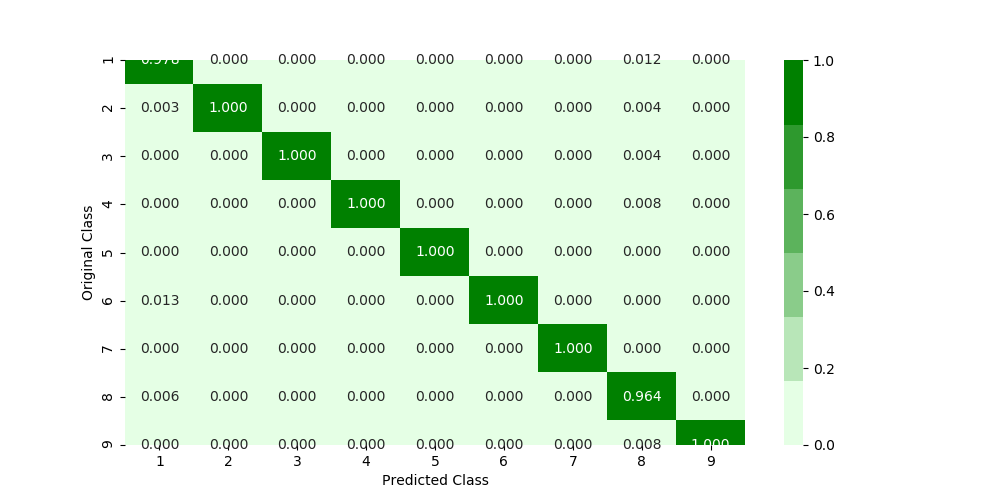

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [135]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.12613092932490125
log_loss for c =  50 is 0.05046792290925984
log_loss for c =  100 is 0.03716618784777969
log_loss for c =  500 is 0.028214251305650667
log_loss for c =  1000 is 0.028413136976191338
log_loss for c =  2000 is 0.0280535809910035
log_loss for c =  3000 is 0.027691680778416


<IPython.core.display.Javascript object>


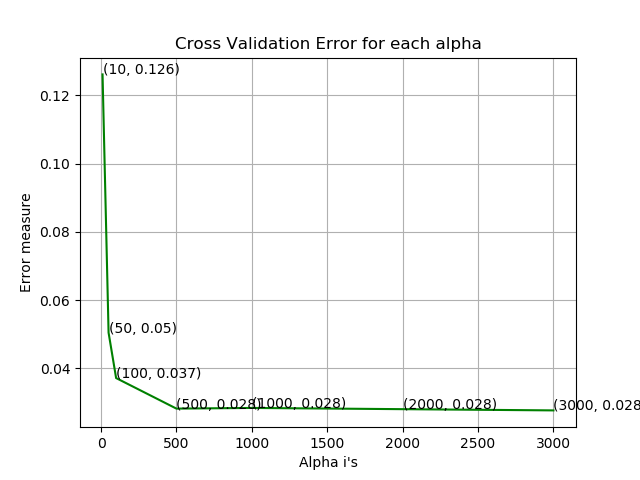

For values of best alpha =  3000 The train log loss is: 0.012400535311745406
For values of best alpha =  3000 The cross validation log loss is: 0.027691680778416
For values of best alpha =  3000 The test log loss is: 0.0268148736345385
Number of misclassified points  0.5059797608095675
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


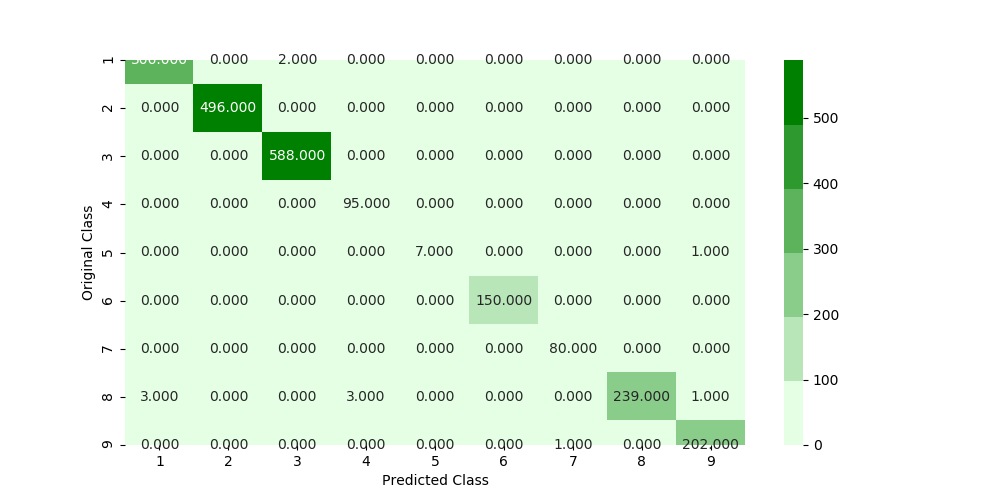

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


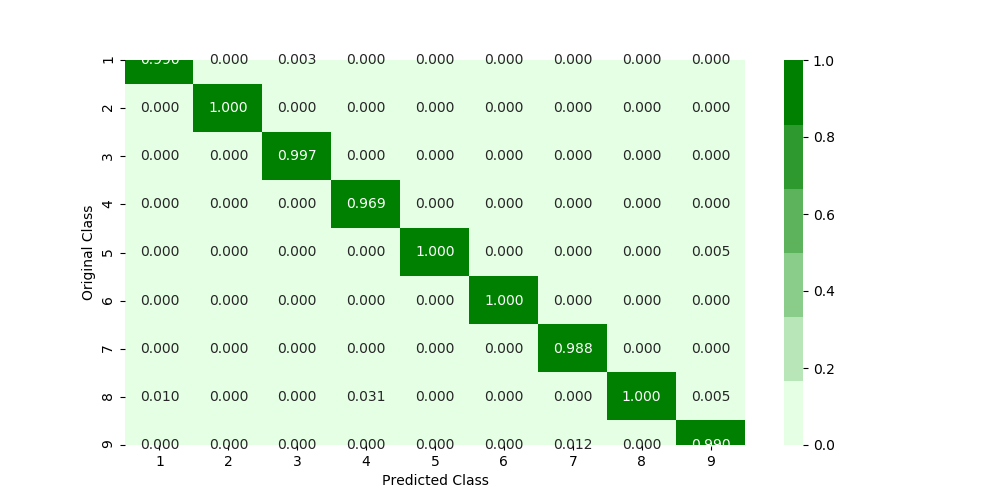

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


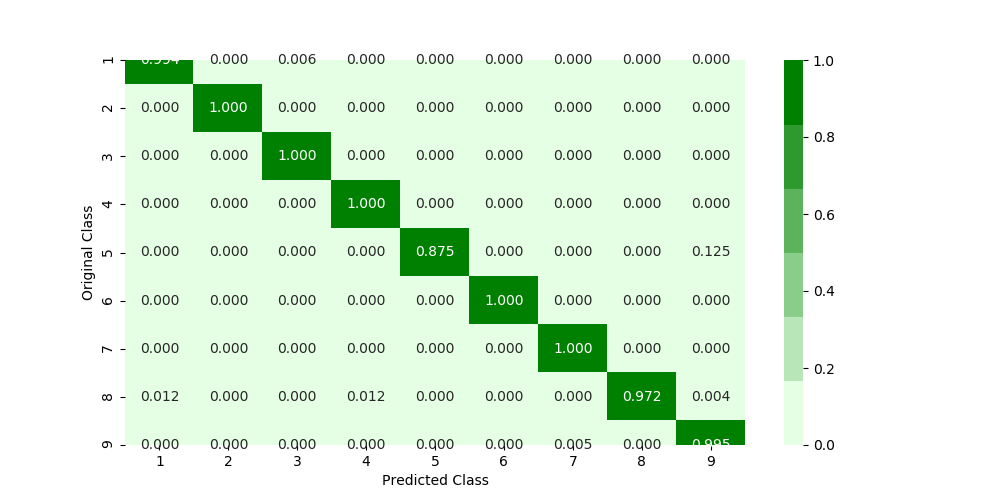

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [106]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 13.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.2min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [107]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.3}


In [108]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.01001014208607596
cv loss 0.03447896424052576
test loss 0.03668573978313264


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [88]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [89]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

In [90]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [96]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_x.to_csv('byte_asm_basic.csv')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.002946  0.002638  0.003531  ...  0.015418  0.025875  0.025744  0.004910   
1  0.006984  0.008267  0.000394  ...  0.004961  0.012316  0.007858  0.007570   
2  0.002155  0.008104  0.002707  ...  0.000095  0.006181  0.000100  0.003773   
3  0.000481  0.000959  0.000521  ...  0.000343  0.000746  0.000301  0.000360   
4  0.000229  0.000376  0.000246  ...  0.000343  0.013875  0.000482  0.012932   

        ecx  edi       ebp       esp       eip    size_y  
0  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 307 columns]

In [97]:
result_x.shape

(10868, 307)

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


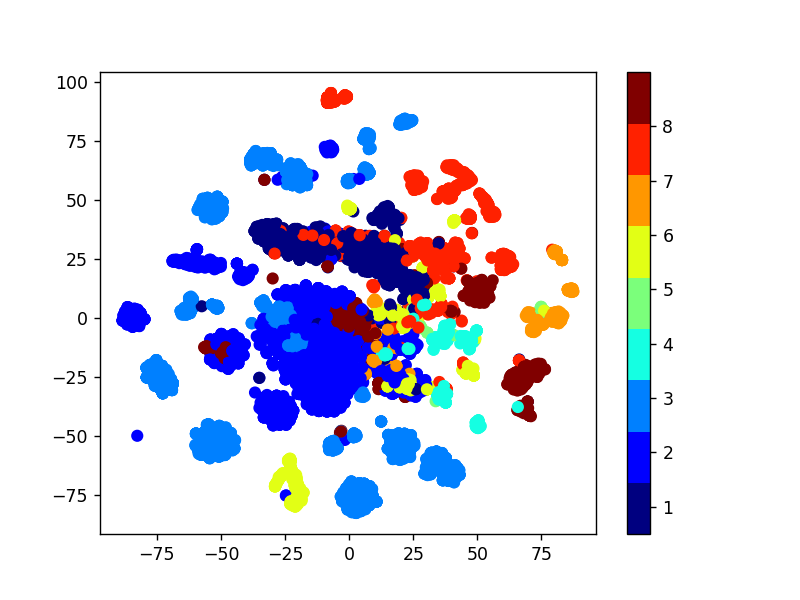

In [0]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x, axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [163]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.042072512638859735
log_loss for c =  50 is 0.039747693564759996
log_loss for c =  100 is 0.039994239378432495
log_loss for c =  500 is 0.038784383365922485
log_loss for c =  1000 is 0.0386179252276146
log_loss for c =  2000 is 0.0388395039086941
log_loss for c =  3000 is 0.03879982260876881


<IPython.core.display.Javascript object>


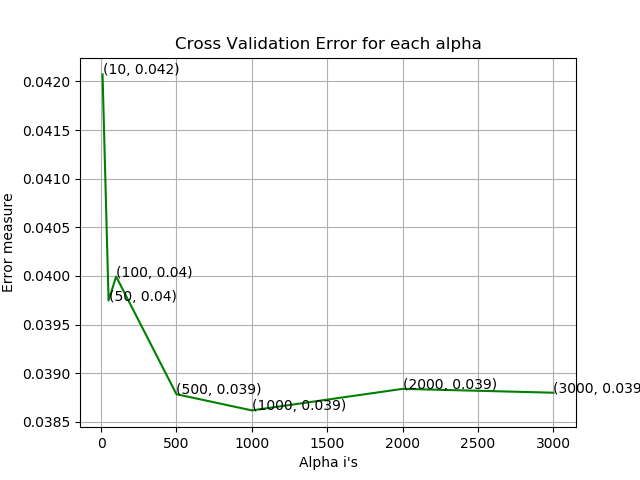

For values of best alpha =  1000 The train log loss is: 0.017074296819176882
For values of best alpha =  1000 The cross validation log loss is: 0.0386179252276146
For values of best alpha =  1000 The test log loss is: 0.032817795353249246


In [164]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.08479004597686815
log_loss for c =  50 is 0.035707242558385435
log_loss for c =  100 is 0.026068628151215485
log_loss for c =  500 is 0.02498304014570476
log_loss for c =  1000 is 0.02473524690358837
log_loss for c =  2000 is 0.024265323193377094
log_loss for c =  3000 is 0.024176025065563777


<IPython.core.display.Javascript object>


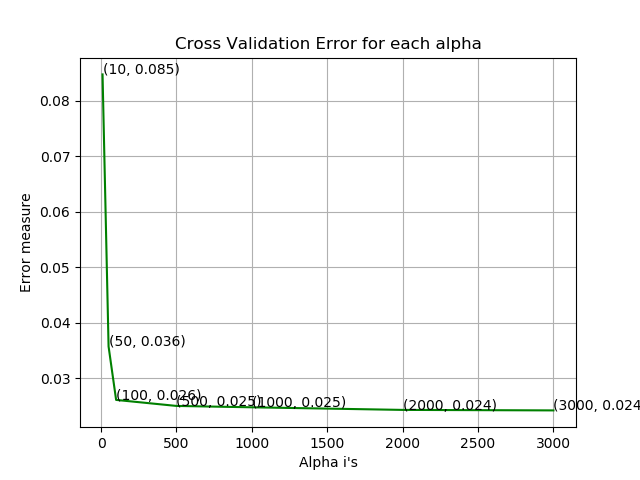

For values of best alpha =  3000 The train log loss is: 0.013088108677365788
For values of best alpha =  3000 The cross validation log loss is: 0.024176025065563777
For values of best alpha =  3000 The test log loss is: 0.026119823890861114


In [165]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [166]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 40.4min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 41.2min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [167]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.5}


For values of best alpha =  3000 The train log loss is: 0.012525729888899871
For values of best alpha =  3000 The cross validation log loss is: 0.024227133119945825
For values of best alpha =  3000 The test log loss is: 0.022135704430197883
Number of misclassified points  82.7046918123275
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


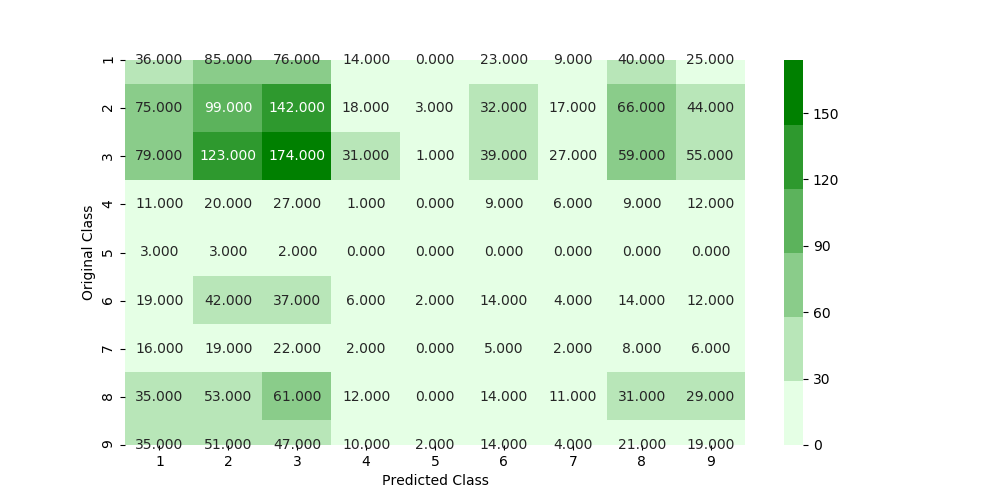

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


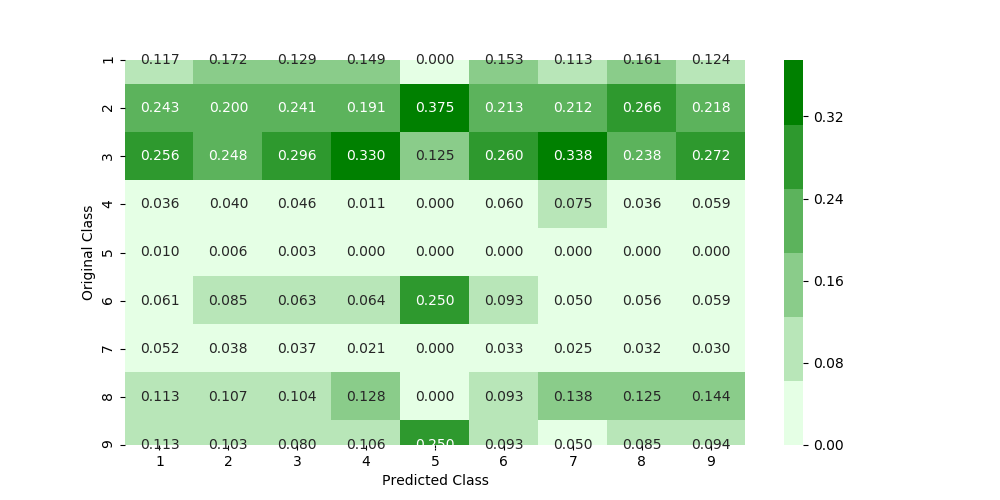

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


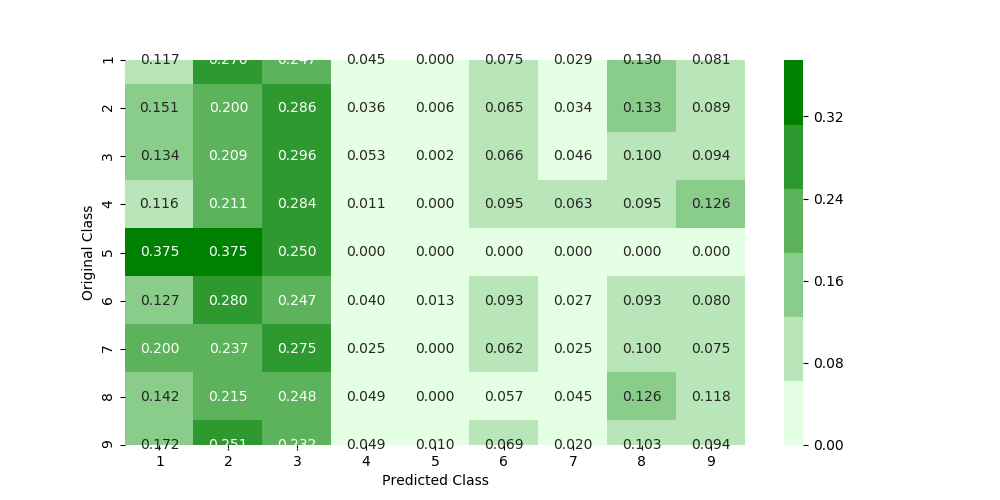

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [169]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=3,learning_rate=0.13,colsample_bytree=0.5,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams and n-gram features on byte files and improve the log-loss</li>
<li> Using the 'dchad' github account (https://github.com/dchad/malware-detection), decrease the logloss to <=0.01 </li>
<li> Watch the video ( https://www.youtube.com/watch?v=VLQTRlLGz5Y ) that was in reference section and implement the image features to improve the logloss </li>
</ol>

1. Add bi-grams and n-gram features on byte files and improve the log-loss

In [3]:
def get_import_feat(x,y,feat):
    rftc = RandomForestClassifier(n_estimators=1000, n_jobs = -1)
    rftc.fit(x, y)
    imp_feat_indx = np.argsort(rftc.feature_importances_)[::-1]
    imp_value = np.take(rftc.feature_importances_, imp_feat_indx)
    imp_feat_name = np.take(feat, imp_feat_indx,axis=0)
    return imp_feat_name.tolist(),imp_value.tolist()

<h2>Byte Bi-gram

In [4]:
# creating vocab for bi-gram and tri-gram
#byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature="00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
byte_feature_sp=byte_feature.split(',')
byte_feature_bi=[byte_feature_sp[i]+' '+byte_feature_sp[j] for i in range(len(byte_feature_sp)) for j in range(len(byte_feature_sp))]
print("Bi-gram {} Len of vocab-{}".format(byte_feature_bi[50:60],len(byte_feature_bi)))
byte_feature_tri=[byte_feature_sp[i]+' '+byte_feature_sp[j]+' '+byte_feature_sp[k] for i in range(len(byte_feature_sp)) for j in range(len(byte_feature_sp)) for k in range(len(byte_feature_sp))]
print("tri-gram {} Len of vocab-{}".format(byte_feature_tri[150:160],len(byte_feature_tri)))

Bi-gram ['00 32', '00 33', '00 34', '00 35', '00 36', '00 37', '00 38', '00 39', '00 3a', '00 3b'] Len of vocab-66049
tri-gram ['00 00 96', '00 00 97', '00 00 98', '00 00 99', '00 00 9a', '00 00 9b', '00 00 9c', '00 00 9d', '00 00 9e', '00 00 9f'] Len of vocab-16974593


In [49]:

%%time
import tqdm
import os
import numpy as np
# creating vocab for bi-gram since we dont have 50GB RAM so can't load all the files to get all possible bigram.
byte_feature="00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
byte_feature_sp=byte_feature.split(',')
byte_feature_bi=[byte_feature_sp[i]+' '+byte_feature_sp[j] for i in range(len(byte_feature_sp)) for j in range(len(byte_feature_sp))]
print("Bi-gram {} Len of vocab-{}".format(byte_feature_bi[50:60],len(byte_feature_bi)))
#array to store bi-gram feature
matrix=np.zeros((10868, 66049), dtype=int)
filelist=os.listdir('E:\\Naveen\\byteFiles_1')

for k,file in enumerate(filelist):
    
    f=open('E:\\Naveen\\byteFiles_1\\'+file,'r')
    lines=f.readlines()
    #generating bi-gram from byte files
    bigram_from_file=[x+' '+ i.split()[j + 1] for i in lines for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
    
    myDict = { k:0 for k in byte_feature_bi}
    #Counting by-grams and storing in dict 
    for bi in bigram_from_file:
        myDict[str(bi).lower()]+=1
    # storing feature in matrix form    
    for i,val in enumerate(myDict.values()):
        matrix[k][i]=val
    if k%1000==0:
        print("done",k)
        break
    f.close()

Bi-gram ['00 32', '00 33', '00 34', '00 35', '00 36', '00 37', '00 38', '00 39', '00 3a', '00 3b'] Len of vocab-66049
done 0
Wall time: 5.13 s


Above code to calculate bi-gram consuming more time,as per suggestion of team used countvectorizer to calculate bi-gram.

In [5]:
# r"[a-f0-9]{2}|\?{2} pattern will consider all character like ??,a-f and 0-9
%%time
from sklearn.feature_extraction.text import CountVectorizer
import scipy
file_sq=[]
bigram = CountVectorizer(lowercase=True,ngram_range=(2,2), vocabulary=byte_feature_bi,token_pattern=r"[a-f0-9]{2}|\?{2}")
by_bi_vect = scipy.sparse.csr_matrix((10868, 66049),dtype=int)
for i, file in enumerate(os.listdir('byteFiles')):
    file_sq.append(os.path.splitext(file)[0])
    fie = open('byteFiles\\' + file)
    by_bi_vect[i]=bigram.fit_transform([fie.read().replace('\n', ' ').lower()])
    if i%1000==0:
        print('Done',i)
    fie.close()

Done 0
Done 1000
Done 2000
Done 3000
Done 4000
Done 5000
Done 6000
Done 7000
Done 8000
Done 9000
Done 10000
Wall time: 1d 9h 11min 44s


In [7]:
by_bi_vect=by_bi_vect.toarray()
by_bi_dataframe=pd.DataFrame(by_bi_vect,columns=byte_feature_bi)
by_bi_dataframe['ID']=file_sq
by_bi_dataframe.to_csv('by_bi_features.csv')

In [196]:
byte_bigram=pd.read_csv('by_bi_feature.csv')
byte_bigram.drop(byte_bigram.columns[byte_bigram.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
byte_bigram.head()

ID   00 00  00 01  00 02  00 03  00 04  00 05  00 06  \
0  01azqd4InC7m9JpocGv5  274425   1269   1029   1469   1227   1144   1437   
1  01IsoiSMh5gxyDYTl4CB   21075    752     73     48    175     12     10   
2  01jsnpXSAlgw6aPeDxrU   16798    596    159    144    513    595    557   
3  01kcPWA9K2BOxQeS5Rju   10417    225     61     69    114     40     25   
4  01SuzwMJEIXsK7A8dQbl   16271     62     22    126      9     11      3   

   00 07  00 08  ...  ?? f7  ?? f8  ?? f9  ?? fa  ?? fb  ?? fc  ?? fd  ?? fe  \
0   1263   1174  ...      0      0      0      0      0      0      0      0   
1     11     42  ...      0      0      0      0      0      0      0      0   
2    146    528  ...      0      0      0      0      0      0      0      0   
3     22     63  ...      0      0      0      0      0      0      0      0   
4      5     11  ...      0      0      0      0      0      0      0      0   

   ?? ff  ?? ??  
0      0   1819  
1      0   8580  
2      0    459  
3      0  13932  
4      0   9000  

[5 rows x 66050 columns]

In [5]:
#i have used numpy to speedup the normalize function.Already provided function ran for 2 days but still i didnt get output.
from numba import jit, cuda 
import numpy as np 
# to measure exec time 
from timeit import default_timer as timer 
@jit
def norm(arr):
    max_value=arr.max()
    min_value=arr.min()
    arr=(arr-min_value)/(max_value-min_value)
    return arr

In [ ]:
from tqdm import tqdm
ai=pd.DataFrame()
for feature_name in tqdm(byte_bigram.columns):
    if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
        ai[feature_name]=norm(byte_bigram[feature_name].to_numpy())
ai['ID']=byte_bigram['ID']
ai.drop(ai.columns[ai.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
ai.to_csv('by_bi_feature_nor.csv')

In [ ]:
by_bi_feature_nor=pd.read_csv('by_bi_feature_nor.csv')

In [25]:
by_bi_feature_nor=pd.merge(by_bi_feature_nor,Y,on=['ID'])
by_bi_feature_nor.drop(by_bi_feature_nor.columns[by_bi_feature_nor.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
by_bi_feature_nor.head()

00 00     00 01     00 02     00 03     00 04     00 05     00 06  \
0  0.120031  0.088735  0.061455  0.097375  0.084423  0.114160  0.121491   
1  0.009218  0.052584  0.004360  0.003182  0.012041  0.001197  0.000845   
2  0.007347  0.041675  0.009496  0.009545  0.035297  0.059375  0.047092   
3  0.004556  0.015733  0.003643  0.004574  0.007844  0.003992  0.002114   
4  0.007117  0.004335  0.001314  0.008352  0.000619  0.001098  0.000254   

      00 07     00 08     00 09  ...  ?? f9  ?? fa  ?? fb  ?? fc  ?? fd  \
0  0.134319  0.078845  0.057238  ...    0.0    0.0    0.0    0.0    0.0   
1  0.001170  0.002821  0.000406  ...    0.0    0.0    0.0    0.0    0.0   
2  0.015527  0.035460  0.006941  ...    0.0    0.0    0.0    0.0    0.0   
3  0.002340  0.004231  0.000676  ...    0.0    0.0    0.0    0.0    0.0   
4  0.000532  0.000739  0.000135  ...    0.0    0.0    0.0    0.0    0.0   

   ?? fe  ?? ff     ?? ??                    ID  Class  
0    0.0    0.0  0.000128  01azqd4InC7m9JpocGv5      9  
1    0.0    0.0  0.000606  01IsoiSMh5gxyDYTl4CB      2  
2    0.0    0.0  0.000032  01jsnpXSAlgw6aPeDxrU      9  
3    0.0    0.0  0.000984  01kcPWA9K2BOxQeS5Rju      1  
4    0.0    0.0  0.000635  01SuzwMJEIXsK7A8dQbl      8  

[5 rows x 66051 columns]

In [33]:
y=by_bi_feature_nor['Class']
feature_name,feature_import=get_import_feat(by_bi_feature_nor.drop(['Class','ID'],inplace=False,axis=1),y,byte_feature_bi)

In [119]:
#taking top 300 features of byte bigram
best_feat=feature_name[:300]
best_feat.insert(0,'ID')
print("Top 200 feature\n",best_feat)
byte_asm_basic=pd.read_csv('byte_asm_basic.csv')
byte_asm_by_bi=pd.merge(by_bi_feature_nor[best_feat],byte_asm_basic,on='ID')

Top 200 feature
 ['ID', '44 49', '4e 47', 'd5 d7', '?? ??', '49 4e', 'fd b3', 'b5 bb', '5a 52', '7d c9', 'f1 98', '5d c3', '41 44', '9a 8a', '96 86', '58 50', 'f9 7b', 'ff 55', '50 41', '47 58', '47 50', '59 85', '02 83', '29 87', '2f 06', 'f7 8c', '4e ea', 'ed 67', 'd7 d9', 'cf f4', '4b cd', 'ae ef', '2f 90', 'ee 71', 'a6 28', 'c7 45', '0a 2d', '8b 00', '40 00', '00 65', '8b 8b', 'ca d3', '0d 2f', 'c3 6a', 'd3 eb', '8c 98', '6c 00', '8b 45', '77 07', 'ee 58', 'dd 7a', '7d fc', 'f5 7b', 'f9 b5', '2a 88', '96 f7', '29 86', 'a2 0e', 'f7 92', 'e6 8c', 'f5 a9', '93 2f', 'f7 b9', 'ba ee', '0a cf', '2a df', '95 2f', 'f7 ac', '85 00', 'cd 5b', 'c0 74', '59 04', '0f 7f', '09 c7', '97 87', '03 83', '08 72', '8b ff', '00 04', '74 03', '03 55', '00 61', '00 8d', '00 12', '50 00', 'c3 8b', '72 00', '8a 06', '24 95', 'ff 59', '8b 31', 'fc fe', '97 86', '59 e8', '52 36', 'fd f3', '07 47', '83 ca', '00 ff', '45 08', '36 30', '8e 99', 'ff 75', '00 77', '2f 91', 'ff 00', '8b 75', '46 01', '6a 00', 'c6 

In [ ]:
byte_asm_by_bi.to_csv('byte_asm_by_bi.csv')

In [35]:
byte_asm_by_bi=pd.read_csv('byte_asm_by_bi.csv')
byte_asm_by_bi.isnull().all()

ID        False
44 49     False
4e 47     False
d5 d7     False
?? ??     False
49 4e     False
fd b3     False
b5 bb     False
5a 52     False
7d c9     False
f1 98     False
5d c3     False
41 44     False
9a 8a     False
96 86     False
58 50     False
f9 7b     False
ff 55     False
50 41     False
47 58     False
47 50     False
59 85     False
02 83     False
29 87     False
2f 06     False
f7 8c     False
4e ea     False
ed 67     False
d7 d9     False
cf f4     False
          ...  
inc       False
dec       False
add       False
imul      False
xchg      False
or        False
shr       False
cmp       False
call      False
shl       False
ror       False
rol       False
jnb       False
jz        False
rtn        True
lea       False
movzx     False
.dll      False
std::     False
:dword    False
edx       False
esi       False
eax       False
ebx       False
ecx       False
edi       False
ebp       False
esp       False
eip       False
size_y    False
Length: 610, dtype: bool

In [36]:
result_x=byte_asm_by_bi.drop(['Class','ID'],inplace=False,axis=1)
result_y=byte_asm_by_bi['Class']
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h4>ASM+BYTE+BYTE bi-gram

10
50
100
500
1000
2000
3000
log_loss for c =  10 is 0.07095555045734649
log_loss for c =  50 is 0.038671975199800306
log_loss for c =  100 is 0.03165336160302733
log_loss for c =  500 is 0.028505117683335992
log_loss for c =  1000 is 0.028060905818630587
log_loss for c =  2000 is 0.028061902069083416
log_loss for c =  3000 is 0.02806201450686813


<IPython.core.display.Javascript object>


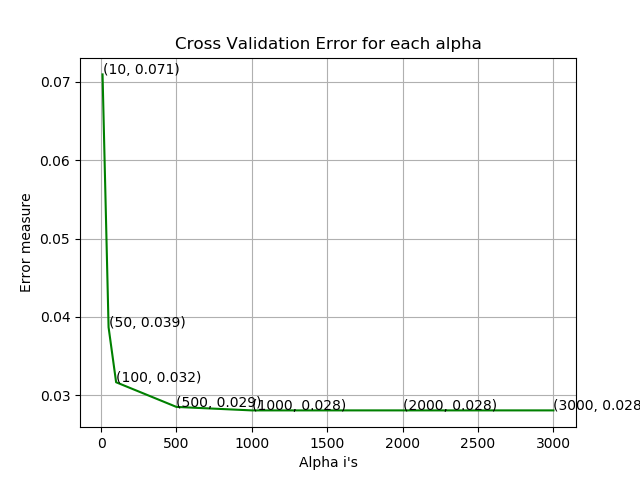

For values of best alpha =  1000 The train log loss is: 0.010131655481191415
For values of best alpha =  1000 The cross validation log loss is: 0.028060905818630587
For values of best alpha =  1000 The test log loss is: 0.023407154070973497
Wall time: 2h 30min 36s


In [9]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))
    print(i)
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [27]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 51.7min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 62.3min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [28]:
results_2=pd.DataFrame(random_cfl.cv_results_).sort_values(by='rank_test_score').head(10)
results_2.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3    1143.099031      1.093809         1.830492        0.044735   
0     593.293344      2.379010         0.967249        0.045926   
1     114.441554      0.688808         0.556429        0.007353   
9     634.851429      7.735008         0.790420        0.007381   
5     122.668907      1.851349         0.514825        0.012738   

  param_subsample param_n_estimators param_max_depth param_learning_rate  \
3             0.3               2000              10                 0.2   
0               1               1000               3                 0.1   
1               1                200               5                 0.1   
9             0.5                500               5                0.05   
5               1                100              10                0.03   

  param_colsample_bytree                                             params  \
3                    0.5  {'subsample': 0.3, 'n_estimators': 2000, 'max_...   
0                    0.3  {'subsample': 1, 'n_estimators': 1000, 'max_de...   
1                    0.1  {'subsample': 1, 'n_estimators': 200, 'max_dep...   
9                      1  {'subsample': 0.5, 'n_estimators': 500, 'max_d...   
5                    0.3  {'subsample': 1, 'n_estimators': 100, 'max_dep...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
3           0.996122           0.993100           0.993521         0.994249   
0           0.994830           0.994394           0.993089         0.994105   
1           0.996553           0.993532           0.991793         0.993961   
9           0.995692           0.993100           0.992225         0.993674   
5           0.995261           0.992238           0.991361         0.992955   

   std_test_score  rank_test_score  
3        0.001337                1  
0        0.000740                2  
1        0.001967                3  
9        0.001472                4  
5        0.001671                5

For values of best alpha =  500 The train log loss is: 0.010025100509812502
For values of best alpha =  500 The cross validation log loss is: 0.029191585283587358
For values of best alpha =  500 The test log loss is: 0.028872405951530757
Number of misclassified points  0.6899724011039559
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


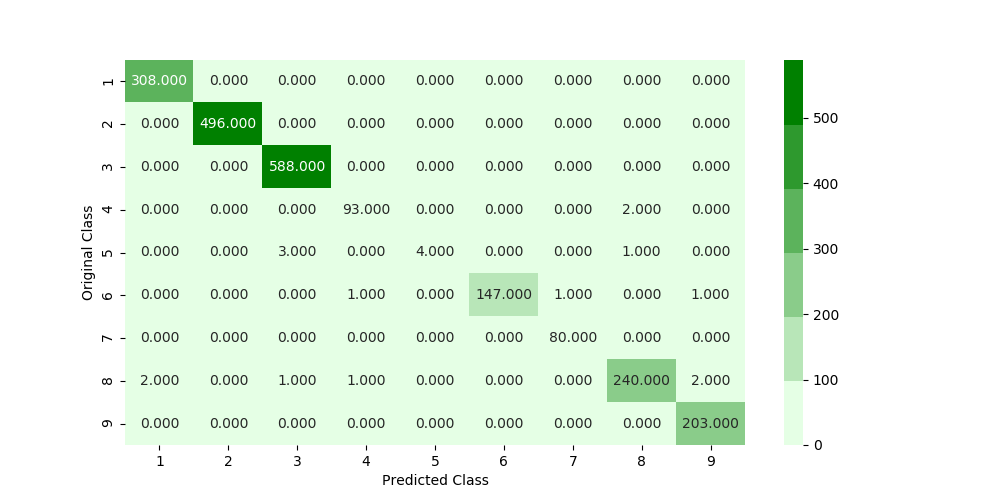

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


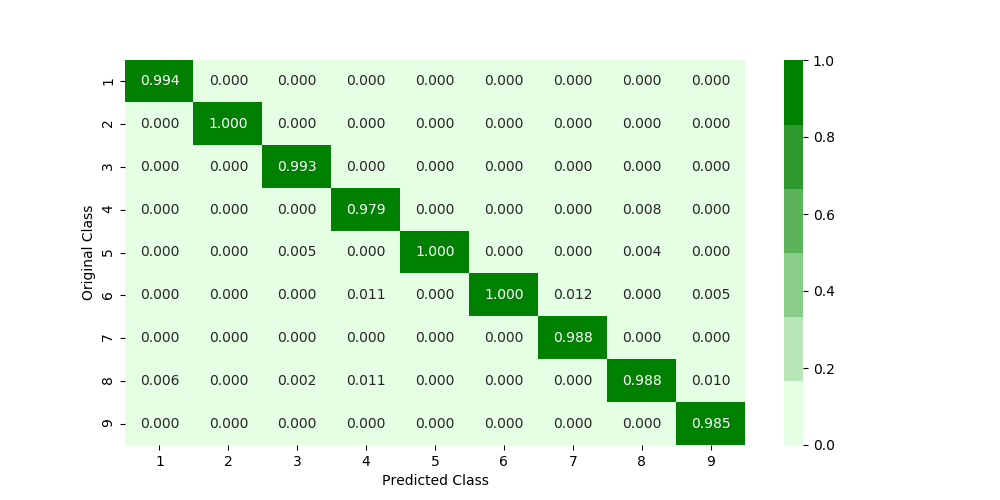

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


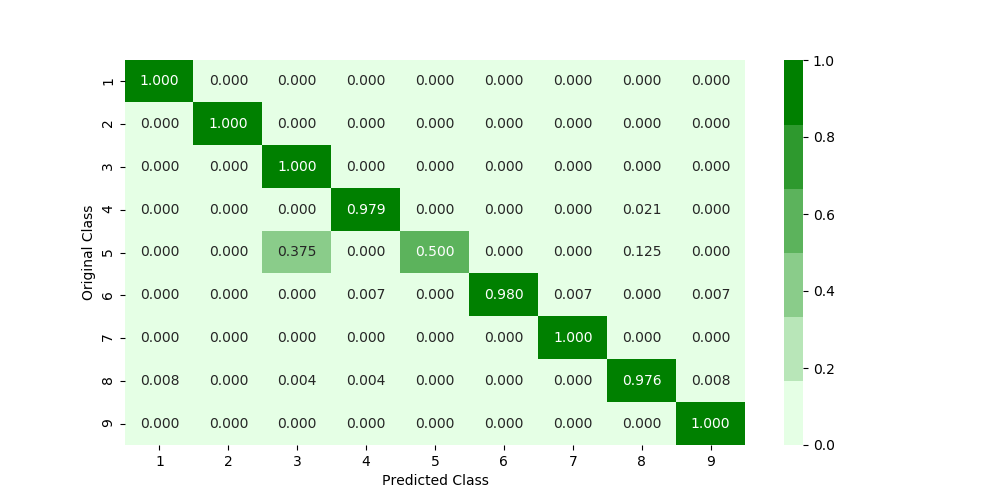

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000,max_depth=10,learning_rate=0.2,colsample_bytree=0.5,subsample=0.3,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

1.	We have unique 256 feature for byte files, for bi-gram 256 P 2= 65280 permutations took 1d 9h to calculate.
2.	If I want to calculate tri-gram 256 P 2=16581120 permutations I have tried calculating tri-gram but got error unable to allocate space.


<h3>ASM bi-gram

In [12]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
opcode_feature_sp=opcodes

opcode_feature_bi=[opcode_feature_sp[i]+' '+opcode_feature_sp[j] for i in range(len(opcode_feature_sp)) for j in range(len(opcode_feature_sp))]
print("Bi-gram {} Len of vocab-{}".format(opcode_feature_bi[50:60],len(opcode_feature_bi)))
opcode_feature_tri=[opcode_feature_sp[i]+' '+opcode_feature_sp[j]+' '+opcode_feature_sp[k] for i in range(len(opcode_feature_sp)) for j in range(len(opcode_feature_sp)) for k in range(len(opcode_feature_sp))]
print("tri-gram {} Len of vocab-{}".format(opcode_feature_tri[150:160],len(opcode_feature_tri)))
opcode_feature_tri=[opcode_feature_sp[i]+' '+opcode_feature_sp[j]+' '+opcode_feature_sp[k] for i in range(len(opcode_feature_sp)) for j in range(len(opcode_feature_sp)) for k in range(len(opcode_feature_sp))]
print("tri-gram {} Len of vocab-{}".format(opcode_feature_tri[150:160],len(opcode_feature_tri)))
opcode_feature_tet=[opcode_feature_sp[i]+' '+opcode_feature_sp[j]+' '+opcode_feature_sp[k]+' '+opcode_feature_sp[l] for i in range(len(opcode_feature_sp)) for j in range(len(opcode_feature_sp)) for k in range(len(opcode_feature_sp))for l in range(len(opcode_feature_sp))]
print("tetra-gram {} Len of vocab-{}".format(opcode_feature_tet[150:160],len(opcode_feature_tet)))

Bi-gram ['mov lea', 'mov movzx', 'retf jmp', 'retf mov', 'retf retf', 'retf push', 'retf pop', 'retf xor', 'retf retn', 'retf nop'] Len of vocab-676
tri-gram ['jmp xor rol', 'jmp xor jnb', 'jmp xor jz', 'jmp xor rtn', 'jmp xor lea', 'jmp xor movzx', 'jmp retn jmp', 'jmp retn mov', 'jmp retn retf', 'jmp retn push'] Len of vocab-17576
tri-gram ['jmp xor rol', 'jmp xor jnb', 'jmp xor jz', 'jmp xor rtn', 'jmp xor lea', 'jmp xor movzx', 'jmp retn jmp', 'jmp retn mov', 'jmp retn retf', 'jmp retn push'] Len of vocab-17576
tetra-gram ['jmp jmp xor rol', 'jmp jmp xor jnb', 'jmp jmp xor jz', 'jmp jmp xor rtn', 'jmp jmp xor lea', 'jmp jmp xor movzx', 'jmp jmp retn jmp', 'jmp jmp retn mov', 'jmp jmp retn retf', 'jmp jmp retn push'] Len of vocab-456976


In [ ]:
%%time
import tqdm
import os
import numpy as np
# creating vocab for bi-gram since we dont have 50GB RAM so can't load all the files to get all possible bigram.
opte_feature_sp=opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
opte_feature_bi=[opte_feature_sp[i]+' '+opte_feature_sp[j] for i in range(len(opte_feature_sp)) for j in range(len(opte_feature_sp))]
print("Bi-gram {} Len of vocab-{}".format(opte_feature_bi[50:60],len(opte_feature_bi)))
#array to store bi-gram feature
matrix=np.zeros((10868, 676), dtype=int)
filelist=os.listdir('asmFiles_1')

for k,file in enumerate(filelist):
    opcod_from_file=''
    word=''
    f=open('asmFiles_1\\'+file,'r',errors='replace')
    lines=f.readlines()
    for line in lines:
        line=line.rstrip().split()
        for word in line:
            if word in opcodes:
                opcod_from_file+= word+' '    
    #generating bi-gram from opte files
    bigram_from_file=[x+' '+ i.split()[j + 1] for i in [opcod_from_file] for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
    
    myDict = { k:0 for k in opte_feature_bi}
    #Counting op-grams and storing in dict 
    for bi in bigram_from_file:
        myDict[str(bi).lower()]+=1
    # storing feature in matrix form    
    for i,val in enumerate(myDict.values()):
        matrix[k][i]=val
    if k%1==0:
        print("done",k)
        break
    f.close()

In [271]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
import scipy
file_sq=[]
word=''
bigram = CountVectorizer(lowercase=True,ngram_range=(2,2), vocabulary=opcode_feature_bi)
op_bi_vect =scipy.sparse.csr_matrix((10868, 676))
for i, file in enumerate(os.listdir('asmFiles')):
    file_sq.append(os.path.splitext(file)[0])
    word=''
    opcod_from_file=''
    fie = open('asmFiles\\' + file,errors ='replace')
    lines=fie.readlines()
    for line in lines:
        line=line.rstrip().split()
        for word in line:
            if word in opcodes:
                opcod_from_file+= word+' '
    op_bi_vect[i]=bigram.transform([opcod_from_file])
    if i%1000==0:
        print('Done',i)
    fie.close()  


Done 0
Done 1000
Done 2000
Done 3000
Done 4000
Done 5000
Done 6000
Done 7000
Done 8000
Done 9000
Done 10000
Wall time: 4h 8min 42s


In [273]:
op_bi_vect_1=op_bi_vect.toarray()
op_bi_dataframe=pd.DataFrame(op_bi_vect_1,columns=opcode_feature_bi)
op_bi_dataframe['ID']=file_sq
op_bi_dataframe.to_csv('op_bi_csv.csv')

In [15]:
op_bi_csv=pd.read_csv('op_bi_csv.csv')
op_bi_csv.drop(op_bi_csv.columns[op_bi_csv.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
op_bi_csv.head()

ID  jmp jmp  jmp mov  jmp retf  jmp push  jmp pop  \
0  01azqd4InC7m9JpocGv5      440      192         0         6        0   
1  01IsoiSMh5gxyDYTl4CB        0       32         0         3        1   
2  01jsnpXSAlgw6aPeDxrU        0        0         0         0        0   
3  01kcPWA9K2BOxQeS5Rju        0        5         0         1        0   
4  01SuzwMJEIXsK7A8dQbl        5       57         1         4        1   

   jmp xor  jmp retn  jmp nop  jmp sub  ...  movzx call  movzx shl  movzx ror  \
0       17         0        0       24  ...           0          0          0   
1        3         1        0        0  ...           0          0          0   
2        0         0        0        0  ...           0          0          0   
3        2         1        0        0  ...           0          0          0   
4        1         0        0        0  ...           0          0          0   

   movzx rol  movzx jnb  movzx jz  movzx rtn  movzx lea  movzx movzx  Class  
0          0          0         0          0          0            0      9  
1          0          0         0          0          0            0      2  
2          0          0         3          0         17           12      9  
3          0          0         0          0          0            0      1  
4          0          0         0          0          0            4      8  

[5 rows x 678 columns]

In [16]:
op_bi_csv=normalize(op_bi_csv)

In [17]:
op_bi_csv.head()

ID   jmp jmp   jmp mov  jmp retf  jmp push   jmp pop  \
0  01azqd4InC7m9JpocGv5  0.143229  0.011155  0.000000  0.002826  0.000000   
1  01IsoiSMh5gxyDYTl4CB  0.000000  0.001859  0.000000  0.001413  0.001379   
2  01jsnpXSAlgw6aPeDxrU  0.000000  0.000000  0.000000  0.000000  0.000000   
3  01kcPWA9K2BOxQeS5Rju  0.000000  0.000290  0.000000  0.000471  0.000000   
4  01SuzwMJEIXsK7A8dQbl  0.001628  0.003312  0.008475  0.001884  0.001379   

    jmp xor  jmp retn  jmp nop   jmp sub  ...  movzx call  movzx shl  \
0  0.012518  0.000000      0.0  0.036641  ...         0.0        0.0   
1  0.002209  0.001992      0.0  0.000000  ...         0.0        0.0   
2  0.000000  0.000000      0.0  0.000000  ...         0.0        0.0   
3  0.001473  0.001992      0.0  0.000000  ...         0.0        0.0   
4  0.000736  0.000000      0.0  0.000000  ...         0.0        0.0   

   movzx ror  movzx rol  movzx jnb  movzx jz  movzx rtn  movzx lea  \
0        0.0        0.0        0.0  0.000000        NaN   0.000000   
1        0.0        0.0        0.0  0.000000        NaN   0.000000   
2        0.0        0.0        0.0  0.007042        NaN   0.018559   
3        0.0        0.0        0.0  0.000000        NaN   0.000000   
4        0.0        0.0        0.0  0.000000        NaN   0.000000   

   movzx movzx  Class  
0     0.000000      9  
1     0.000000      2  
2     0.008457      9  
3     0.000000      1  
4     0.002819      8  

[5 rows x 678 columns]

In [163]:
print(op_bi_csv.isnull().all())
op_bi_csv=op_bi_csv.fillna(0)

ID             False
jmp jmp        False
jmp mov        False
jmp retf       False
jmp push       False
               ...  
movzx jz       False
movzx rtn       True
movzx lea      False
movzx movzx    False
Class          False
Length: 678, dtype: bool


In [176]:
y=op_bi_csv['Class']

feature_name,feature_import=get_import_feat(op_bi_csv.drop(['Class','ID'],inplace=False,axis=1),y,opcode_feature_bi)

In [178]:
byte_asm_by_bi=pd.read_csv('byte_asm_by_bi.csv')
#taking top 200 features
best_feat=feature_name[:200]
print("Top 200 feature\n",best_feat)
best_feat.insert(0,'ID')
byte_asm_basic=pd.read_csv('byte_asm_basic.csv')
byte_asm_by_bi_as_bi=pd.merge(op_bi_csv[best_feat],byte_asm_by_bi,on='ID')
byte_asm_by_bi_as_bi.to_csv('byte_asm_by_bi_as_bi.csv')

Top 200 feature
 ['mov pop', 'mov mov', 'call cmp', 'retn push', 'jz mov', 'add pop', 'mov jmp', 'cmp jnb', 'mov add', 'jz cmp', 'add mov', 'mov lea', 'dec or', 'add cmp', 'call add', 'mov jz', 'shl inc', 'mov cmp', 'cmp cmp', 'pop pop', 'mov movzx', 'cmp mov', 'jnb mov', 'call xor', 'sub lea', 'mov shr', 'call jz', 'lea mov', 'or inc', 'inc shl', 'jmp push', 'pop retn', 'mov call', 'xor retn', 'xor mov', 'sub mov', 'mov sub', 'jmp mov', 'dec sub', 'call pop', 'cmp jz', 'or shl', 'retn mov', 'shl lea', 'call push', 'inc mov', 'call retn', 'pop add', 'jmp cmp', 'inc or', 'push push', 'sub dec', 'add call', 'dec mov', 'jz lea', 'call mov', 'sub cmp', 'cmp lea', 'xor pop', 'or mov', 'xor cmp', 'add retn', 'xor jmp', 'xor push', 'sub push', 'pop sub', 'pop push', 'shl jmp', 'movzx sub', 'call jmp', 'movzx cmp', 'lea pop', 'mov retn', 'jmp dec', 'mov shl', 'push shl', 'add push', 'mov push', 'push sub', 'lea push', 'mov xor', 'push lea', 'mov inc', 'retn jmp', 'cmp jmp', 'cmp movzx', 'jmp j

In [188]:
byte_asm_by_bi_as_bi.to_csv('byte_asm_by_bi_as_bi.csv')

In [30]:
byte_asm_by_bi_as_bi=pd.read_csv('byte_asm_by_bi_as_bi.csv')
result_x=byte_asm_by_bi_as_bi.drop(['Class','ID'],inplace=False,axis=1)
result_y=byte_asm_by_bi_as_bi['Class']
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h4>ASM+BYTE+BYTE bi-gram+ASM bi-gram

10
50
100
500
1000
2000
3000
log_loss for c =  10 is 0.06996053254733271
log_loss for c =  50 is 0.025888061273687746
log_loss for c =  100 is 0.0156450897785024
log_loss for c =  500 is 0.015488138251131373
log_loss for c =  1000 is 0.015461271402495879
log_loss for c =  2000 is 0.015461568534814236
log_loss for c =  3000 is 0.01546116243617371


<IPython.core.display.Javascript object>


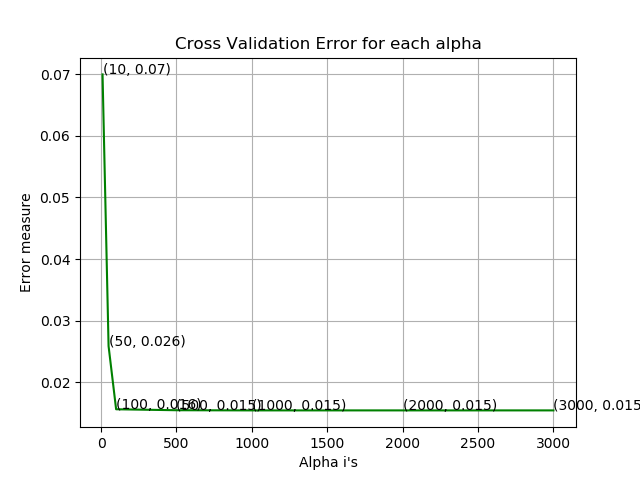

For values of best alpha =  3000 The train log loss is: 0.009670394519863306
For values of best alpha =  3000 The cross validation log loss is: 0.01546116243617371
For values of best alpha =  3000 The test log loss is: 0.030069049694299403
Wall time: 4h 40s


In [15]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))
    print(i)
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [31]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 29.9min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.6min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [32]:
results_2=pd.DataFrame(random_cfl.cv_results_).sort_values(by='rank_test_score').head(10)
results_2.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3     206.667116      1.155358         0.603218        0.007351   
9     423.115554      2.275295         0.722830        0.007357   
1     722.015590      6.897350         0.748788        0.022027   
2     309.254533      3.041143         0.530394        0.012737   
8     356.630040      4.240338         1.029645        0.012738   

  param_subsample param_n_estimators param_max_depth param_learning_rate  \
3               1                200              10                 0.1   
9             0.3                500              10                0.15   
1               1                500              10                 0.1   
2               1                200              10                 0.2   
8             0.5                500               3                0.03   

  param_colsample_bytree                                             params  \
3                    0.3  {'subsample': 1, 'n_estimators': 200, 'max_dep...   
9                    0.5  {'subsample': 0.3, 'n_estimators': 500, 'max_d...   
1                      1  {'subsample': 1, 'n_estimators': 500, 'max_dep...   
2                      1  {'subsample': 1, 'n_estimators': 200, 'max_dep...   
8                    0.1  {'subsample': 0.5, 'n_estimators': 500, 'max_d...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
3           0.992245           0.996550           0.993952         0.994249   
9           0.993106           0.994825           0.994384         0.994105   
1           0.991814           0.994825           0.995248         0.993961   
2           0.991814           0.994394           0.994816         0.993674   
8           0.993106           0.994825           0.993089         0.993674   

   std_test_score  rank_test_score  
3        0.001771                1  
9        0.000729                2  
1        0.001529                3  
2        0.001327                4  
8        0.000815                4

For values of best alpha =  500 The train log loss is: 0.010806163230215745
For values of best alpha =  500 The cross validation log loss is: 0.03077928947026928
For values of best alpha =  500 The test log loss is: 0.019531704395173013
Number of misclassified points  0.18399264029438822
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


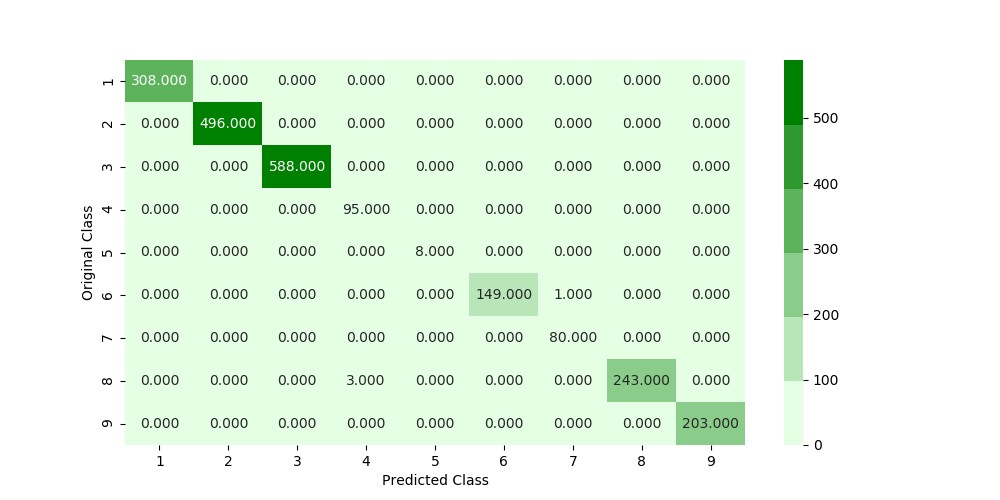

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


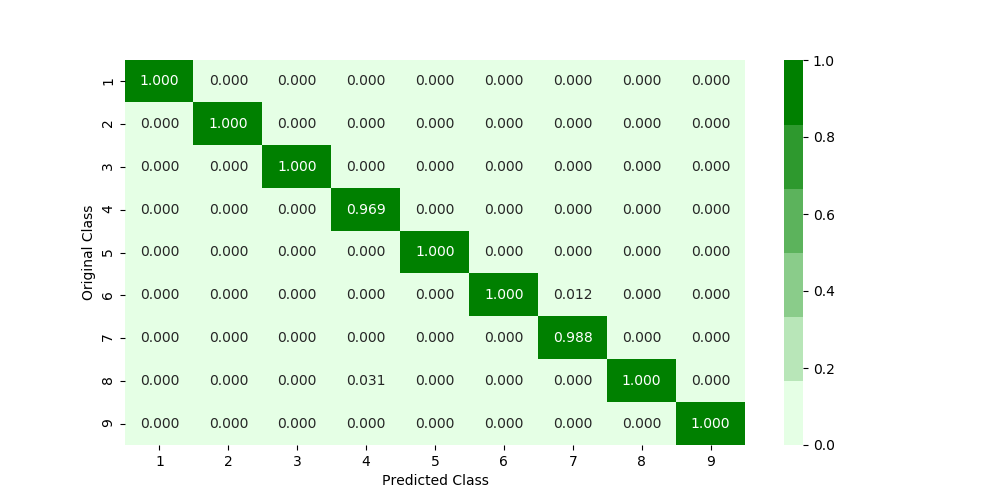

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


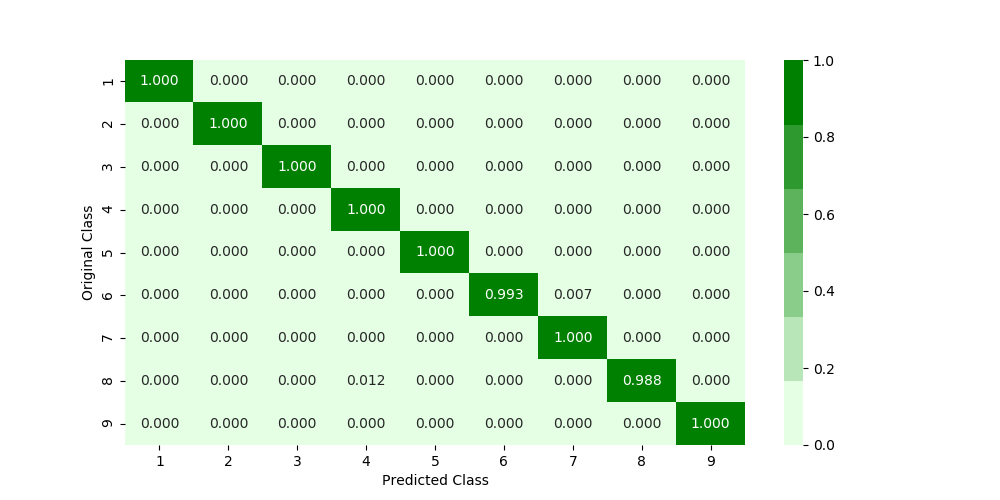

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [33]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,max_depth=10,learning_rate=0.1,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3>ASM image

In [ ]:
#copied from https://towardsdatascience.com/malware-classification-using-machine-learning-7c648fb1da79
import array
for asmfile in os.listdir("asmFiles"):
    filename = asmfile.split('.')[0]
    file = codecs.open("asmFiles\\" + asmfile, 'rb')
    filelen = os.path.getsize("asmFiles\\" + asmfile)
    width = int(filelen ** 0.5)
    rem = int(filelen / width)
    arr = array.array('B')
    arr.frombytes(file.read())
    file.close()
    reshaped = np.reshape(arr[:width * width], (width, width))
    reshaped = np.uint8(reshaped)
    imageio.imwrite('asm_image\\' + filename + '.png',reshaped)

In [ ]:
import os
import matplotlib.image as mpimg 
from scipy import sparse
file_sq=[]
asm_image_200=sparse.csr_matrix((10868,200))
for i, asm_image in enumerate(os.listdir("asm_image")):
    file_sq.append(os.path.splitext(asm_image )[0])
    img = mpimg.imread("asm_image\\" + asm_image)
    img_array = img.flatten()[:200]
    asm_image_200[i] = img_array

In [ ]:
import pandas as pd
asm_image_feature=pd.DataFrame(asm_image_200.toarray())
asm_image_feature['ID']=file_sq
asm_image_feature=pd.read_csv('asm_image_feature_200.csv')

<h4>ASM+BYTE+BYTE bi-gram+ASM bi-gram+ASM image

In [44]:
byte_asm_by_bi_as_bi=pd.read_csv('byte_asm_by_bi_as_bi.csv')
asm_image_feature=pd.read_csv('asm_image_feature_200.csv')
byte_asm_by_bi_as_bi_img=pd.merge(byte_asm_by_bi_as_bi,asm_image_feature,on='ID',how='right')
byte_asm_by_bi_as_bi_img.drop(byte_asm_by_bi_as_bi_img.columns[byte_asm_by_bi_as_bi_img.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
byte_asm_by_bi_as_bi_img.to_csv('byte_asm_by_bi_as_bi_img.csv')
byte_asm_by_bi_as_bi_img.head()

ID   mov pop   mov mov  call cmp  retn push    jz mov  \
0  01azqd4InC7m9JpocGv5  0.018024  0.017598  0.025735   0.011019  0.024619   
1  01IsoiSMh5gxyDYTl4CB  0.005889  0.011655  0.001217   0.004528  0.001328   
2  01jsnpXSAlgw6aPeDxrU  0.000000  0.000000  0.001043   0.003774  0.000000   
3  01kcPWA9K2BOxQeS5Rju  0.000357  0.000252  0.000348   0.000755  0.000443   
4  01SuzwMJEIXsK7A8dQbl  0.001963  0.012209  0.000174   0.002868  0.005756   

    add pop   mov jmp   cmp jnb   mov add    ...          190       191  \
0  0.003616  0.016531  0.000000  0.018445    ...     0.286275  0.431373   
1  0.000904  0.003406  0.012500  0.009602    ...     0.431373  0.396078   
2  0.000000  0.000000  0.000000  0.000000    ...     0.286275  0.431373   
3  0.000000  0.000301  0.001630  0.000168    ...     0.286275  0.431373   
4  0.000603  0.005110  0.008152  0.032763    ...     0.286275  0.431373   

        192       193       194       195       196       197       198  \
0  0.454902  0.396078  0.447059  0.380392  0.388235  0.454902  0.411765   
1  0.447059  0.380392  0.454902  0.396078  0.392157  0.125490  0.384314   
2  0.454902  0.396078  0.447059  0.380392  0.388235  0.454902  0.411765   
3  0.454902  0.396078  0.447059  0.380392  0.388235  0.454902  0.411765   
4  0.454902  0.396078  0.447059  0.380392  0.388235  0.454902  0.411765   

        199  
0  0.462745  
1  0.474510  
2  0.462745  
3  0.462745  
4  0.462745  

[5 rows x 1009 columns]

In [47]:
byte_asm_by_bi_as_bi_img=pd.read_csv('byte_asm_by_bi_as_bi_img.csv')
result_x=byte_asm_by_bi_as_bi_img.drop(['Class','ID'],inplace=False,axis=1)
result_y=byte_asm_by_bi_as_bi_img['Class']
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

10
50
100
500
1000
2000
3000
log_loss for c =  10 is 0.06486179395544589
log_loss for c =  50 is 0.03544213916556889
log_loss for c =  100 is 0.026183472760997167
log_loss for c =  500 is 0.025111965882450727
log_loss for c =  1000 is 0.0255700192815137
log_loss for c =  2000 is 0.025668509082081042
log_loss for c =  3000 is 0.025666978640191074


<IPython.core.display.Javascript object>


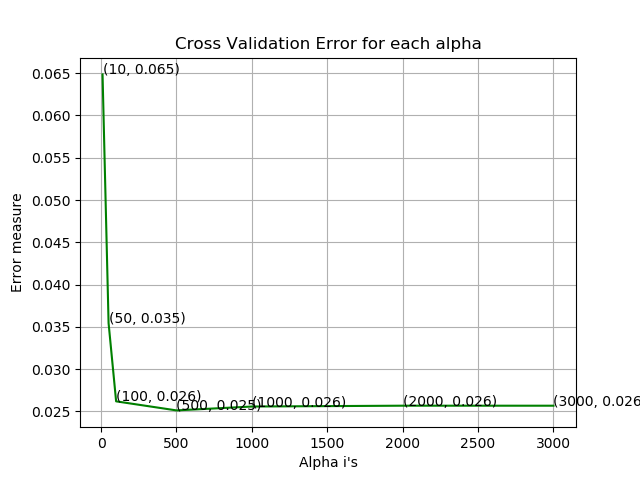

For values of best alpha =  500 The train log loss is: 0.010119368617793667
For values of best alpha =  500 The cross validation log loss is: 0.025111965882450727
For values of best alpha =  500 The test log loss is: 0.026440728317946936
Wall time: 12h 34min 58s


In [48]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))
    print(i)
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [50]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 76.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 97.8min remaining: 10.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 107.5min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [51]:
results_2=pd.DataFrame(random_cfl.cv_results_).sort_values(by='rank_test_score').head(10)
results_2.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2     413.860575      2.167204         0.939111        0.049692   
6     119.151465      1.007207         0.582095        0.006685   
1    2229.696185     34.046552         2.133656        0.031703   
7      86.234996      0.520381         0.630770        0.022428   
4     773.239694      4.586989         1.327554        0.030927   

  param_subsample param_n_estimators param_max_depth param_learning_rate  \
2             0.5                500               3                 0.1   
6               1                100               5                 0.2   
1               1               2000              10                0.05   
7             0.3                100               3                0.15   
4             0.1               1000              10                0.05   

  param_colsample_bytree                                             params  \
2                    0.1  {'subsample': 0.5, 'n_estimators': 500, 'max_d...   
6                    0.3  {'subsample': 1, 'n_estimators': 100, 'max_dep...   
1                    0.5  {'subsample': 1, 'n_estimators': 2000, 'max_de...   
7                    0.1  {'subsample': 0.3, 'n_estimators': 100, 'max_d...   
4                    0.1  {'subsample': 0.1, 'n_estimators': 1000, 'max_...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
2           0.996553           0.995257           0.994384         0.995399   
6           0.995692           0.995257           0.994816         0.995255   
1           0.995261           0.994825           0.994816         0.994968   
7           0.993968           0.993532           0.991793         0.993098   
4           0.993537           0.993100           0.990929         0.992523   

   std_test_score  rank_test_score  
2        0.000891                1  
6        0.000357                2  
1        0.000207                3  
7        0.000939                4  
4        0.001140                5

For values of best alpha =  500 The train log loss is: 0.009725271241896892
For values of best alpha =  500 The cross validation log loss is: 0.021185611847296747
For values of best alpha =  500 The test log loss is: 0.02218951306351652
Number of misclassified points  0.36798528058877644
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


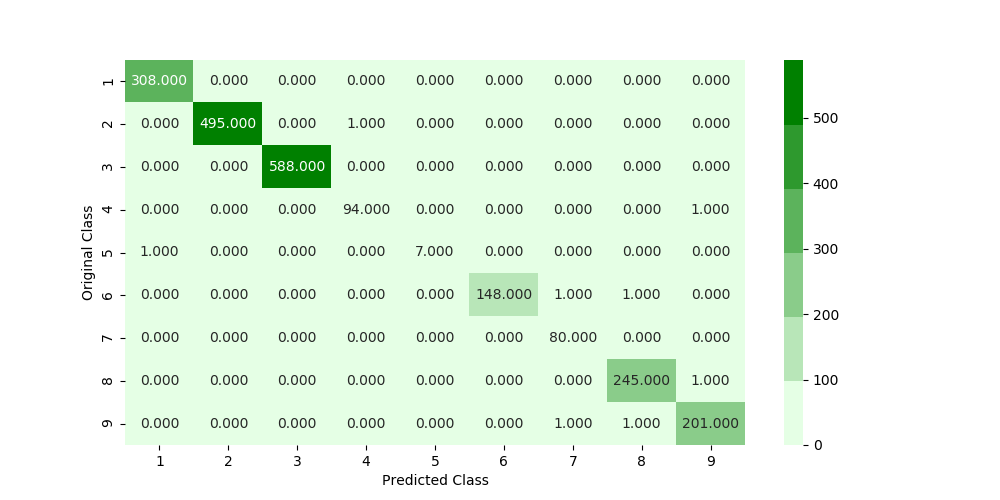

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


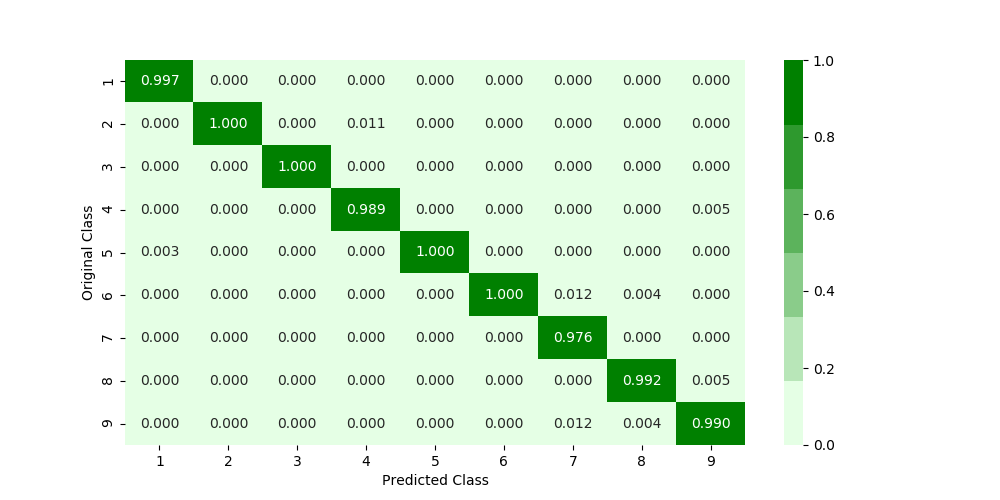

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


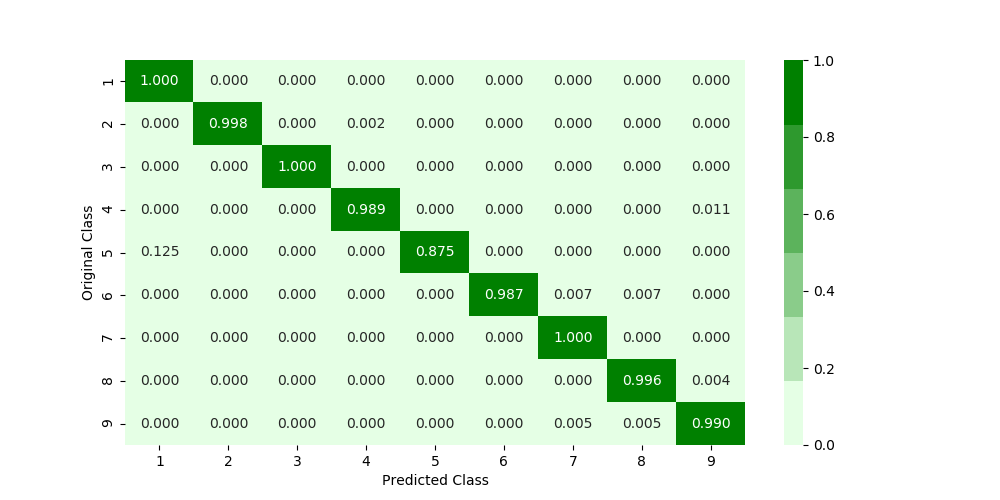

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [52]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=500,max_depth=3,learning_rate=0.1,colsample_bytree=0.3,subsample=0.5,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3>ASM Tri-gram

In [33]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
import scipy
file_sq=[]
word=''
trigram = CountVectorizer(lowercase=True,ngram_range=(3,3), vocabulary=opcode_feature_tri)
op_tri_vect =scipy.sparse.csr_matrix((10868, 17576))
for i, file in enumerate(os.listdir('asmFiles')):
    file_sq.append(os.path.splitext(file)[0])
    word=''
    opcod_from_file=''
    fie = open('asmFiles\\' + file,errors ='replace')
    lines=fie.readlines()
    for line in lines:
        line=line.rstrip().split()
        for word in line:
            if word in opcodes:
                opcod_from_file+= word+' '
               
    op_tri_vect[i]=trigram.transform([opcod_from_file])
    if i%1000==0:
        print('Done',i)
    fie.close()  


Done 0
Done 1000
Done 2000
Done 3000
Done 4000
Done 5000
Done 6000
Done 7000
Done 8000
Done 9000
Done 10000
Wall time: 3h 48min 12s


In [34]:
op_tri_vect=op_tri_vect.toarray()
op_tri_dataframe=pd.DataFrame(op_tri_vect,columns=opcode_feature_tri)
op_tri_dataframe.to_csv('op_tri_feature.csv')
op_tri_csv=pd.read_csv('op_tri_feature.csv')
op_tri_csv['ID']=file_sq
op_tri_csv.to_csv('op_tri_feature.csv')

In [9]:
op_tri_csv=pd.read_csv('op_tri_feature.csv')
op_tri_csv.drop(op_tri_csv.columns[op_tri_csv.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
op_tri_csv.head()

jmp jmp jmp  jmp jmp mov  jmp jmp retf  jmp jmp push  jmp jmp pop  \
0          437            0             0             0            0   
1            0            0             0             0            0   
2            0            0             0             0            0   
3            0            0             0             0            0   
4            2            1             1             1            0   

   jmp jmp xor  jmp jmp retn  jmp jmp nop  jmp jmp sub  jmp jmp inc  ...  \
0            1             0            0            0            0  ...   
1            0             0            0            0            0  ...   
2            0             0            0            0            0  ...   
3            0             0            0            0            0  ...   
4            0             0            0            0            0  ...   

   lea xor rol  lea xor jnb  lea xor jz  lea xor rtn  lea xor lea  \
0            0            0           1            0            0   
1            0            0           0            0            0   
2            0            0           1            0            3   
3            0            0           0            0            0   
4            0            0           0            0            0   

   lea xor movzx  lea retn jmp  lea retn mov                    ID  Class  
0              0             0             1  01azqd4InC7m9JpocGv5      9  
1              0             0             0  01IsoiSMh5gxyDYTl4CB      2  
2              2             0             0  01jsnpXSAlgw6aPeDxrU      9  
3              0             0             0  01kcPWA9K2BOxQeS5Rju      1  
4              0             0             0  01SuzwMJEIXsK7A8dQbl      8  

[5 rows x 16384 columns]

In [10]:
from tqdm import tqdm
ai=pd.DataFrame()
for feature_name in tqdm(op_tri_csv.columns):
    if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
        ai[feature_name]=norm(op_tri_csv[feature_name].to_numpy())
ai['ID']=op_tri_csv['ID']
ai['Class']=op_tri_csv['Class']
ai.drop(ai.columns[ai.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
op_tri_csv=ai
op_tri_csv.head()

100%|████████████████████████████████████████████████████████████████████████████| 16384/16384 [02:53<00:00, 94.63it/s]


jmp jmp jmp  jmp jmp mov  jmp jmp retf  jmp jmp push  jmp jmp pop  \
0     0.143420     0.000000      0.000000      0.000000          0.0   
1     0.000000     0.000000      0.000000      0.000000          0.0   
2     0.000000     0.000000      0.000000      0.000000          0.0   
3     0.000000     0.000000      0.000000      0.000000          0.0   
4     0.000656     0.000945      0.025641      0.014493          0.0   

   jmp jmp xor  jmp jmp retn  jmp jmp nop  jmp jmp sub  jmp jmp inc  ...  \
0     0.007246           0.0          0.0          0.0          0.0  ...   
1     0.000000           0.0          0.0          0.0          0.0  ...   
2     0.000000           0.0          0.0          0.0          0.0  ...   
3     0.000000           0.0          0.0          0.0          0.0  ...   
4     0.000000           0.0          0.0          0.0          0.0  ...   

   lea xor rol  lea xor jnb  lea xor jz  lea xor rtn  lea xor lea  \
0          0.0          0.0    0.038462          NaN     0.000000   
1          0.0          0.0    0.000000          NaN     0.000000   
2          0.0          0.0    0.038462          NaN     0.012658   
3          0.0          0.0    0.000000          NaN     0.000000   
4          0.0          0.0    0.000000          NaN     0.000000   

   lea xor movzx  lea retn jmp  lea retn mov                    ID  Class  
0       0.000000           0.0      0.027778  01azqd4InC7m9JpocGv5      9  
1       0.000000           0.0      0.000000  01IsoiSMh5gxyDYTl4CB      2  
2       0.166667           0.0      0.000000  01jsnpXSAlgw6aPeDxrU      9  
3       0.000000           0.0      0.000000  01kcPWA9K2BOxQeS5Rju      1  
4       0.000000           0.0      0.000000  01SuzwMJEIXsK7A8dQbl      8  

[5 rows x 16384 columns]

In [15]:
print(op_tri_csv.isnull().all())
op_tri_csv=op_tri_csv.fillna(0)
y=op_tri_csv['Class']
feature_name,feature_import=get_import_feat(op_tri_csv.drop(['Class','ID'],inplace=False,axis=1),y,opcode_feature_tri)

jmp jmp jmp      False
jmp jmp mov      False
jmp jmp retf     False
jmp jmp push     False
jmp jmp pop      False
                 ...  
lea xor movzx    False
lea retn jmp     False
lea retn mov     False
ID               False
Class            False
Length: 16384, dtype: bool


In [18]:
byte_asm_by_bi_as_bi=pd.read_csv('byte_asm_by_bi_as_bi.csv')
#taking top 200 features
best_feat=feature_name[:200]
print("Top 200 feature\n",best_feat)
best_feat.insert(0,'ID')
byte_asm_by_bi_as_bi_tri=pd.merge(op_tri_csv[best_feat],byte_asm_by_bi_as_bi,on='ID')
byte_asm_by_bi_as_bi_tri.to_csv('byte_asm_by_bi_as_bi_tri.csv')

Top 200 feature
 ['add pop push', 'mov mov add', 'mov sub lea', 'pop add pop', 'push mov mov', 'call add pop', 'add pop retn', 'jmp mov mov', 'retn push mov', 'mov mov mov', 'pop retn push', 'pop pop retn', 'mov mov jmp', 'push push lea', 'mov mov lea', 'mov pop retn', 'cmp jz cmp', 'mov sub mov', 'push call add', 'mov add mov', 'xor mov mov', 'pop retn mov', 'mov mov movzx', 'push mov sub', 'mov cmp jnb', 'call mov jz', 'sub lea push', 'mov jmp mov', 'sub lea or', 'push pop call', 'retn mov push', 'add mov mov', 'cmp jnb mov', 'inc sub xor', 'jmp mov add', 'sub dec mov', 'call pop retn', 'mov or shl', 'cmp jz mov', 'add mov add', 'mov mov call', 'mov shl inc', 'pop call add', 'cmp mov mov', 'pop push push', 'sub mov pop', 'push push push', 'mov push mov', 'pop pop pop', 'push push pop', 'sub lea add', 'mov mov cmp', 'mov pop call', 'mov lea mov', 'pop push mov', 'sub lea cmp', 'mov add cmp', 'mov mov retn', 'or inc xor', 'mov mov or', 'jmp mov cmp', 'jz mov mov', 'mov mov pop', 'mov j

In [17]:
byte_asm_by_bi_as_bi_tri=pd.read_csv('byte_asm_by_bi_as_bi_tri.csv')

In [18]:
result_x=byte_asm_by_bi_as_bi_tri.drop(['Class','ID'],inplace=False,axis=1)
result_y=byte_asm_by_bi_as_bi_tri['Class']
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h4>ASM+BYTE+BYTE bi-gram+ASM bi-gram+ASM tri-gram

10
50
100
500
1000
2000
3000
log_loss for c =  10 is 0.08362309048064084
log_loss for c =  50 is 0.050584954666887096
log_loss for c =  100 is 0.03860073735169444
log_loss for c =  500 is 0.038954079593442784
log_loss for c =  1000 is 0.039088420725390476
log_loss for c =  2000 is 0.03908853748985385
log_loss for c =  3000 is 0.03908957074475976


<IPython.core.display.Javascript object>


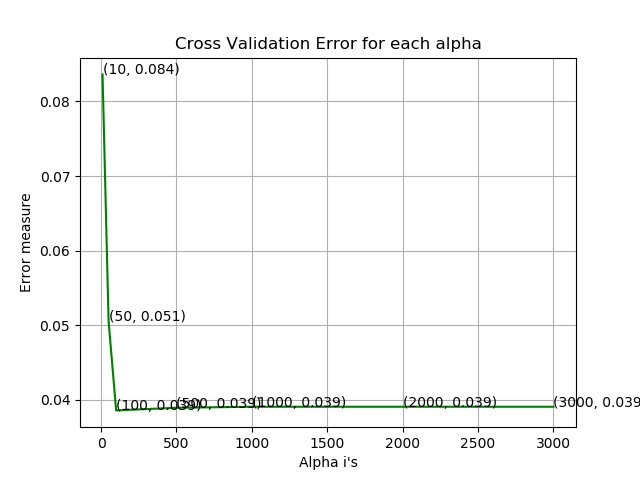

For values of best alpha =  100 The train log loss is: 0.01122940034056545
For values of best alpha =  100 The cross validation log loss is: 0.03860073735169444
For values of best alpha =  100 The test log loss is: 0.024579464345774377
Wall time: 3h 9min 51s


In [19]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))
    print(i)
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

For values of best alpha =  100 The train log loss is: 0.009565756587721224
For values of best alpha =  100 The cross validation log loss is: 0.03383555555422021
For values of best alpha =  100 The test log loss is: 0.023684453368057887
Number of misclassified points  0.3219871205151794
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


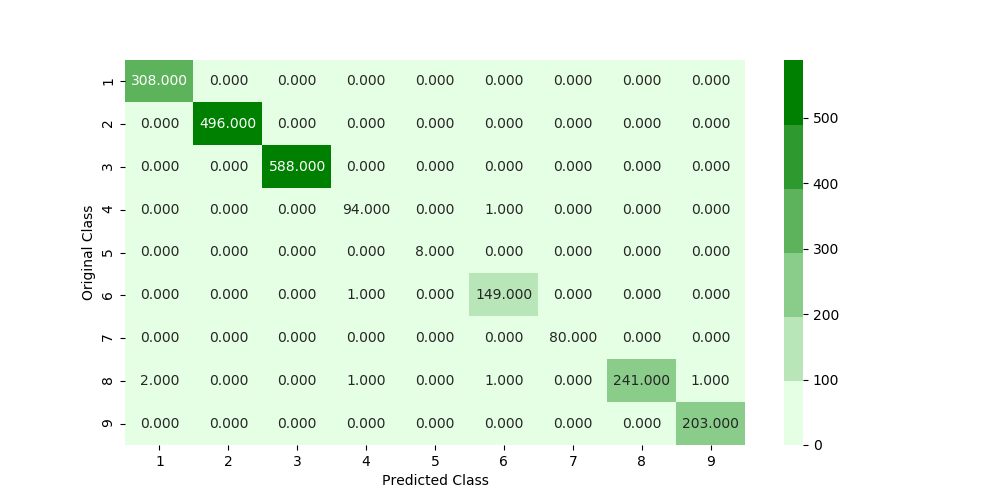

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


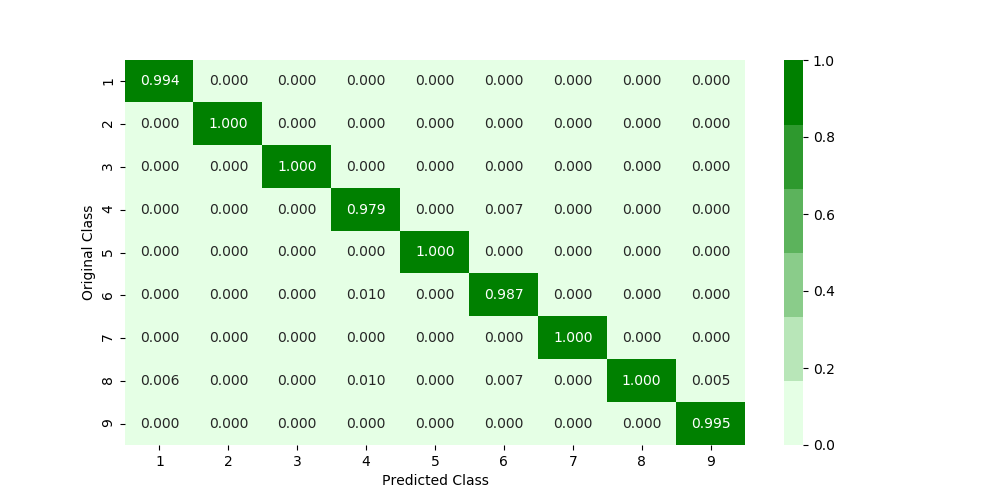

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


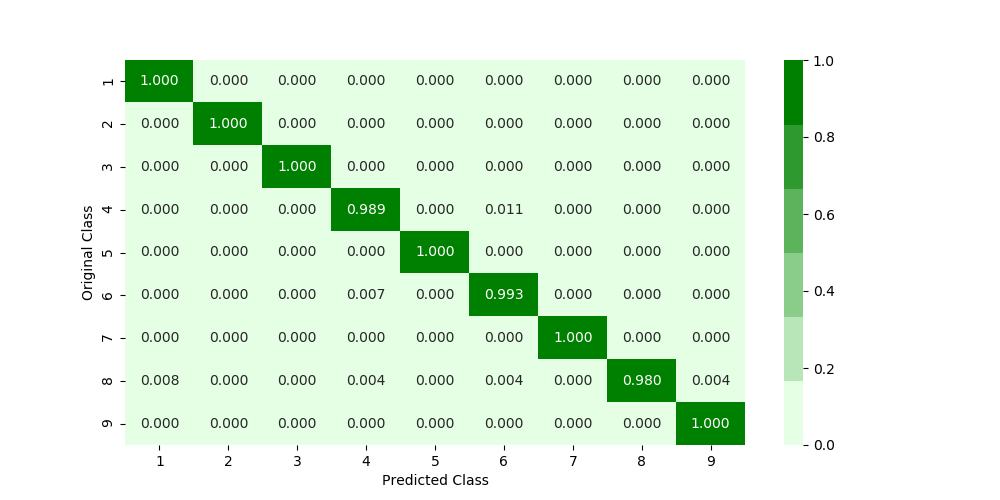

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],max_depth=3,learning_rate=0.13,colsample_bytree=0.5,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

In [ ]:
#copied from https://towardsdatascience.com/malware-classification-using-machine-learning-7c648fb1da79
import array
for asmfile in os.listdir("asmFiles"):
    filename = asmfile.split('.')[0]
    file = codecs.open("asmFiles\\" + asmfile, 'rb')
    filelen = os.path.getsize("asmFiles\\" + asmfile)
    width = int(filelen ** 0.5)
    rem = int(filelen / width)
    arr = array.array('B')
    arr.frombytes(file.read())
    file.close()
    reshaped = np.reshape(arr[:width * width], (width, width))
    reshaped = np.uint8(reshaped)
    imageio.imwrite('asm_image\\' + filename + '.png',reshaped)

In [ ]:

import os
import matplotlib.image as mpimg 
from scipy import sparse
file_sq=[]
asm_image_800=sparse.csr_matrix((10868,800))
for i, asm_image in enumerate(os.listdir("asm_image")):
    file_sq.append(os.path.splitext(asm_image )[0])
    img = mpimg.imread("asm_image\\" + asm_image)
    img_array = img.flatten()[:800]
    if i%1000==0:
        print(i)
    asm_image_800[i] = img_array

In [ ]:
import pandas as pd
asm_image_feature=pd.DataFrame(asm_image_200.toarray())
asm_image_feature['ID']=file_sq
asm_image_feature=pd.read_csv('asm_image_feature.csv')

In [81]:
byte_asm_by_bi_as_bi_tri=pd.read_csv('byte_asm_by_bi_as_bi_tri.csv')
asm_image_feature=pd.read_csv('asm_image_feature8.csv')
asm_image_feature.drop(asm_image_feature.columns[asm_image_feature.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
byte_asm_by_bi_as_bi_tri_img=pd.merge(byte_asm_by_bi_as_bi_tri,asm_image_feature,on='ID',how='right')
byte_asm_by_bi_as_bi_tri_img.to_csv('byte_asm_by_bi_as_bi_tri_img_2.csv')
byte_asm_by_bi_as_bi_tri_img.head()

ID  add pop push  mov mov add  mov sub lea  pop add pop  \
0  01azqd4InC7m9JpocGv5      0.000000     0.018007     0.004866     0.064103   
1  01IsoiSMh5gxyDYTl4CB      0.000000     0.010722     0.012165     0.000000   
2  01jsnpXSAlgw6aPeDxrU      0.000000     0.000000     0.014599     0.000000   
3  01kcPWA9K2BOxQeS5Rju      0.000000     0.000000     0.000000     0.000000   
4  01SuzwMJEIXsK7A8dQbl      0.012658     0.041924     0.002433     0.000000   

   push mov mov  call add pop  add pop retn  jmp mov mov  retn push mov  \
0      0.012170      0.000000      0.002095     0.008039       0.004307   
1      0.003063      0.000709      0.000698     0.001101       0.001895   
2      0.000000      0.000000      0.000000     0.000000       0.004307   
3      0.000161      0.000000      0.000000     0.000330       0.000345   
4      0.000403      0.000000      0.000000     0.001542       0.003274   

     ...          790       791       792       793       794       795  \
0    ...     0.239216  0.239216  0.239216  0.239216  0.239216  0.239216   
1    ...     0.219608  0.211765  0.125490  0.156863  0.313726  0.270588   
2    ...     0.239216  0.239216  0.239216  0.239216  0.239216  0.239216   
3    ...     0.427451  0.435294  0.392157  0.396078  0.423529  0.125490   
4    ...     0.239216  0.239216  0.239216  0.239216  0.239216  0.239216   

        796       797       798       799  
0  0.239216  0.239216  0.239216  0.239216  
1  0.160784  0.050980  0.039216  0.180392  
2  0.239216  0.239216  0.239216  0.239216  
3  0.400000  0.423529  0.380392  0.454902  
4  0.239216  0.239216  0.239216  0.239216  

[5 rows x 1809 columns]

<h4>ASM+BYTE+BYTE bi-gram+ASM bi-gram+ASM tri-gram+ASM Image

In [83]:
byte_asm_by_bi_as_bi_tri_img=pd.read_csv('byte_asm_by_bi_as_bi_tri_img_2.csv')
result_x=byte_asm_by_bi_as_bi_tri_img.drop(['Class','ID'],inplace=False,axis=1)
result_y=byte_asm_by_bi_as_bi_tri_img['Class']
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

10
50
100
500
1000
2000
3000
log_loss for c =  10 is 0.03484414112418154
log_loss for c =  50 is 0.02147601841035497
log_loss for c =  100 is 0.01795610834174262
log_loss for c =  500 is 0.017268671010038924
log_loss for c =  1000 is 0.017269490094095216
log_loss for c =  2000 is 0.01726903703760112
log_loss for c =  3000 is 0.017269171155601695


<IPython.core.display.Javascript object>


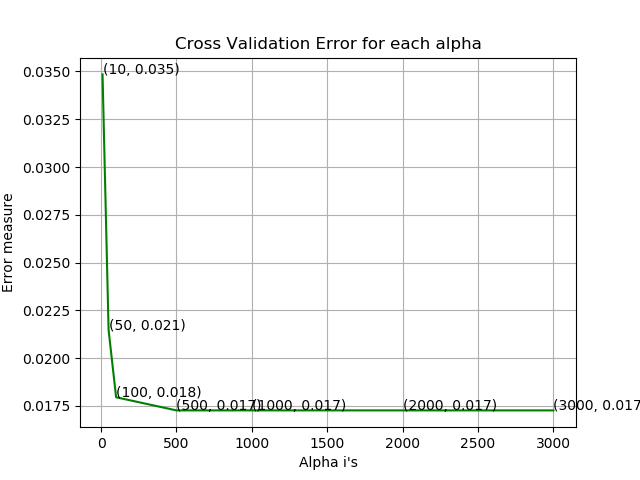

For values of best alpha =  500 The train log loss is: 0.008270631358189312
For values of best alpha =  500 The cross validation log loss is: 0.017268671010038924
For values of best alpha =  500 The test log loss is: 0.01656170683035743
Wall time: 20h 49min 56s


In [84]:
%%time
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))
    print(i)
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [87]:
%%time
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,return_train_score=True)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 50.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 85.3min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 93.3min finished


Wall time: 1h 50min 57s


In [88]:
results_2=pd.DataFrame(random_cfl.cv_results_).sort_values(by='rank_test_score').head(10)
results_2.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7     705.664506      1.641940         1.268556        0.044341   
6     373.734513      3.143381         1.175257        0.032053   
4    3167.910337     27.909757         2.880941        0.040950   
5     182.659146      1.139575         1.149847        0.062616   
0     200.195486      1.800026         1.055653        0.007354   

  param_subsample param_n_estimators param_max_depth param_learning_rate  \
7               1                500               3                 0.2   
6             0.5                200              10                0.15   
4             0.3               2000               3                0.03   
5             0.3                100               5                 0.2   
0               1                100              10                 0.2   

  param_colsample_bytree                                             params  \
7                    0.1  {'subsample': 1, 'n_estimators': 500, 'max_dep...   
6                    0.3  {'subsample': 0.5, 'n_estimators': 200, 'max_d...   
4                    0.3  {'subsample': 0.3, 'n_estimators': 2000, 'max_...   
5                    0.3  {'subsample': 0.3, 'n_estimators': 100, 'max_d...   
0                    0.3  {'subsample': 1, 'n_estimators': 100, 'max_dep...   

        ...         split1_test_score  split2_test_score  mean_test_score  \
7       ...                  0.995688           0.998272         0.997124   
6       ...                  0.995257           0.997408         0.996837   
4       ...                  0.995257           0.997840         0.996693   
5       ...                  0.994825           0.996976         0.996405   
0       ...                  0.994394           0.997408         0.996262   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
7        0.001075                1            1.000000            1.000000   
6        0.001132                2            1.000000            1.000000   
4        0.001074                3            1.000000            1.000000   
5        0.001132                4            0.998921            0.999784   
0        0.001332                5            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
7            1.000000          1.000000         0.000000  
6            1.000000          1.000000         0.000000  
4            1.000000          1.000000         0.000000  
5            0.999784          0.999497         0.000407  
0            1.000000          1.000000         0.000000  

[5 rows x 21 columns]

For values of best alpha =  500 The train log loss is: 0.007568866220899078
For values of best alpha =  500 The cross validation log loss is: 0.01677936703315467
For values of best alpha =  500 The test log loss is: 0.012565061738708595
Number of misclassified points  0.09199632014719411
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


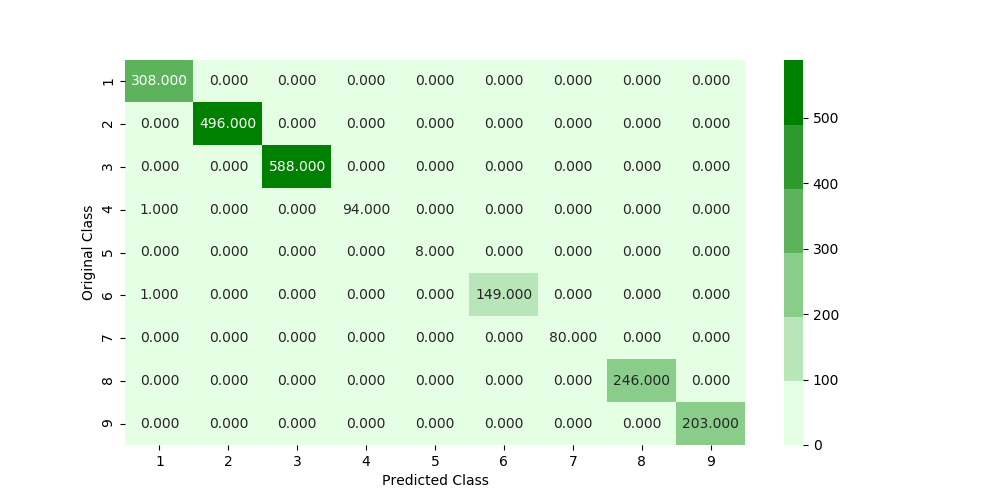

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


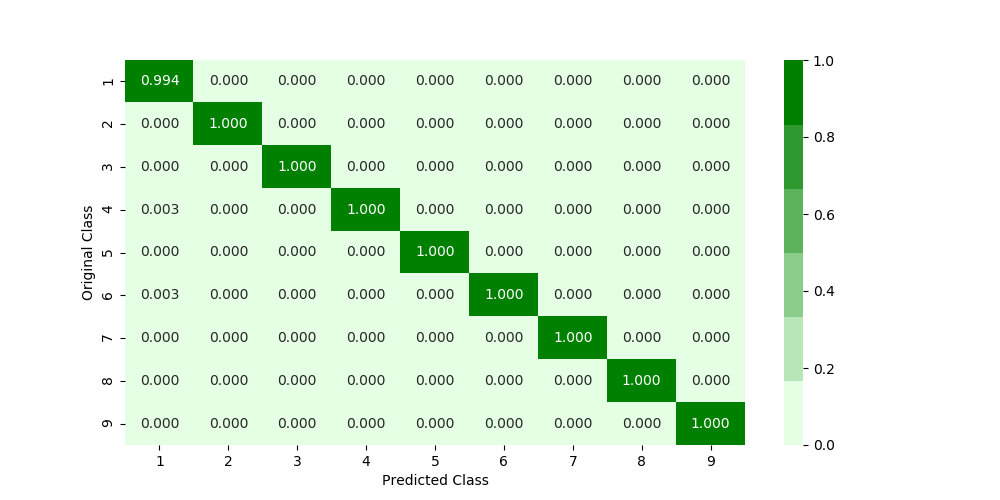

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


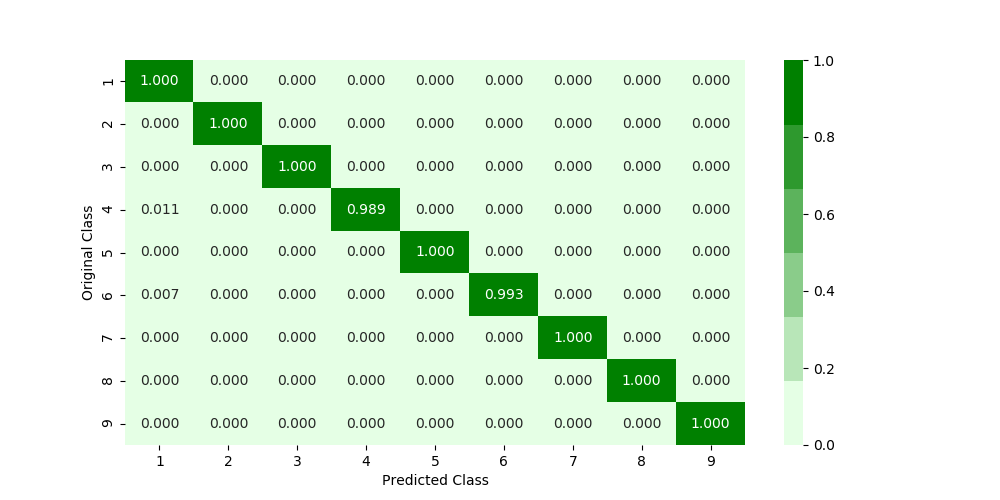

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [89]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],max_depth=3,learning_rate=0.12,colsample_bytree=0.1,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

In [23]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
import scipy
file_sq=[]
word=''
tetgram = CountVectorizer(lowercase=True,ngram_range=(4,4), vocabulary=opcode_feature_tet)
op_tet_vect =scipy.sparse.csr_matrix((10868, 456976),dtype=int)
for i, file in enumerate(os.listdir('E:\\Naveen\\asmFiles')):
    file_sq.append(os.path.splitext(file)[0])
    word=''
    opcod_from_file=''
    fie = open('E:\\Naveen\\asmFiles\\' + file,errors ='replace')
    lines=fie.readlines()
    for line in lines:
        line=line.rstrip().split()
        for word in line:
            if word in opcodes:
                opcod_from_file+= word+' '
               
    op_tet_vect[i]=tetgram.transform([opcod_from_file])
    if i%1000==0:
        print('Done',i)
    fie.close()

Done 0
Done 1000
Done 2000
Done 3000
Done 4000
Done 5000
Done 6000
Done 7000
Done 8000
Done 9000
Done 10000
Wall time: 5h 11min 59s


In [ ]:
op_tet_vect=int(op_tet_vect.toarray())
op_tet_dataframe=pd.DataFrame(op_tet_vect.toarray(),columns=opcode_feature_tet)
op_tet_dataframe['ID']=file_sq
op_tet_dataframe.to_csv('op_tet_feature.csv')

In [ ]:
op_tet_feature=pd.read_csv('op_tet_feature.csv')

MemoryError                               Traceback (most recent call last)
<ipython-input-2-cc9a3b70e393> in <module>
----> 1 op_tet_feature=pd.read_csv('op_tet_feature.csv')
    
    Unable to save op_tet_feature.csv because of memory error.

In [31]:
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["Features","Model","Train-Loss","CV-Loss", "Test-Loss"]

table.add_row(["Asm+Byte","XG boost" , "0.0125","0.0242","0.022" ])
table.add_row(["Asm+Byte+Byte bi","XG boost" , "0.0100","0.0291", "0.0288"])
table.add_row(["Asm+Byte+Byte bi+Asm bi", "XG boost" , "0.0108","0.0307","0.0195" ])
table.add_row(["Asm+Byte+Byte bi+Asm bi+Asm image 200","XG boost" ,  "0.0097","0.0211","0.0221" ])
table.add_row(["Asm+Byte+Byte bi+Asm bi+Asm tri","XG boost" ,  "0.0095","0.0338","0.0236" ])
table.add_row(["Asm+Byte+Byte bi+Asm bi+Asm tri+Asm image 800","XG boost" ,  "0.0075","0.0167","0.0125" ])

print(table)

+-----------------------------------------------+----------+------------+---------+-----------+
|                    Features                   |  Model   | Train-Loss | CV-Loss | Test-Loss |
+-----------------------------------------------+----------+------------+---------+-----------+
|                    Asm+Byte                   | XG boost |   0.0125   |  0.0242 |   0.022   |
|                Asm+Byte+Byte bi               | XG boost |   0.0100   |  0.0291 |   0.0288  |
|            Asm+Byte+Byte bi+Asm bi            | XG boost |   0.0108   |  0.0307 |   0.0195  |
|     Asm+Byte+Byte bi+Asm bi+Asm image 200     | XG boost |   0.0097   |  0.0211 |   0.0221  |
|        Asm+Byte+Byte bi+Asm bi+Asm tri        | XG boost |   0.0095   |  0.0338 |   0.0236  |
| Asm+Byte+Byte bi+Asm bi+Asm tri+Asm image 800 | XG boost |   0.0075   |  0.0167 |   0.0125  |
+-----------------------------------------------+----------+------------+---------+-----------+
